<a href="https://colab.research.google.com/github/yikchungchan/DSA-5101-P1/blob/ashwins-branch/DSA5101_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA 5101 - Python Machine Learning Project

#### Group 28

*   Ashwin Kumaar Raviraj (A0162603N)
*   Chan YikChung
*   Tran Manh Hung




In this group project, we will immerse ourselves in the intriguing domain of predictive analysis using the Bank Marketing dataset. Our primary objective is to harness the capabilities of machine learning to forecast whether a client will opt for a term deposit. The challenge at hand is centered on the direct marketing campaigns carried out by a Portuguese banking institution.

These campaigns primarily relied on telephone conversations. Notably, multiple interactions with the same client were often required to ascertain whether the client would choose to subscribe to the bank's term deposit product ('yes') or decline it ('no').

As part of our group project, we will leverage the Bank Marketing dataset to predict client subscriptions to term deposits.


---


As the dataset is structured, we will follow the ML Model Building steps for structured data as listed below:


1.   **Conceptualization of the modeling task:** This crucial first step entails determining what the output of the model should be, how this model will be used and by whom, and how it will be embedded in existing or new business processes.
2.   **Data collection:** The data traditionally used are mostly numeric data derived from internal and external sources. Such data are typically already in a structured tabular format, with columns of features, rows of instances, and each cell representing a particular value.
3.   **Data preparation and wrangling:** This step involves cleansing and preprocessing of the raw data. Cleansing may entail resolving missing values, out-of-range values, and the like. Preprocessing may involve extracting, aggregating, filtering, and selecting relevant data columns.
4.   **Data exploration:** This step encompasses exploratory data analysis, feature selection, and feature engineering.
5.   **Model training and evaluation:** This step involves selecting the appropriate ML method (or methods), evaluating performance of the trained model, and tuning the model accordingly.



# 1. Conceptualization of the modeling task


In this step, we define the scope and purpose of our predictive modeling task using the Bank Marketing dataset.


*   **Defining the Model's Output:** The output of our model would be the prediction of whether a client will subscribe to a term deposit ('yes') or not ('no'). This output can be critical for the bank's marketing efforts and customer engagement strategies.
*   **Identifying Stakeholders:** In our context, the stakeholders are ourselves (group members). However given the original context of the dataset, the key stakeholders who will benefit from the model's predictions include the bank's marketing teams, campaign managers, and customer relationship managers who can use the insights to tailor their strategies for client engagement.
*   **Integration with Business Processes:** Understanding how the model will fit into existing or new business processes is essential. In the context of the bank marketing dataset, we would consider how the model's predictions will be incorporated into the bank's marketing campaigns and help allocate resources more efficiently.

In the real-world context, by clarifying the model's purpose, its intended users, and its integration into the bank's operations, we will be better prepared to develop a robust predictive model that adds value to the marketing efforts of the bank.



---



# 2. Data Collection

While the traditional process of data collection often involves acquiring data from various internal and external sources, we are provided with a pre-existing dataset for our bank marketing project. This dataset is a valuable resource that contains a wealth of information, and it is already structured in a tabular format, making it suitable for analysis.

In [1]:
import numpy as np
import pandas as pd

#import the training and test data
url_train = "https://raw.githubusercontent.com/yikchungchan/DSA-5101-P1/main/traininingdata.txt"
url_test = "https://raw.githubusercontent.com/yikchungchan/DSA-5101-P1/main/testdata.txt"

# assign data to pandas DataFrame
df_train_raw = pd.read_csv(url_train, sep=';')
df_test_raw = pd.read_csv(url_test, sep=';')

# assign the training dataframe to `df`
df_raw = df_train_raw

# print df
df_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,1,failure,no
36164,60,blue-collar,married,secondary,no,171,yes,no,unknown,19,may,219,2,-1,0,unknown,no
36165,41,technician,married,secondary,no,-274,yes,no,unknown,27,may,182,3,-1,0,unknown,no
36166,45,blue-collar,married,primary,no,103,no,no,cellular,28,jan,64,3,-1,0,unknown,no


In [2]:
df_test_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,housemaid,married,tertiary,no,468,yes,no,unknown,14,may,220,1,-1,0,unknown,no
1,31,management,single,tertiary,no,10215,no,no,cellular,22,aug,139,2,-1,0,unknown,no
2,45,blue-collar,married,primary,no,900,yes,no,unknown,9,jun,213,1,-1,0,unknown,no
3,58,blue-collar,married,primary,no,1231,no,no,unknown,20,jun,21,3,-1,0,unknown,no
4,35,technician,single,tertiary,no,5301,no,no,cellular,21,nov,937,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,27,services,single,secondary,no,1,yes,yes,unknown,2,jun,162,3,-1,0,unknown,no
9039,34,blue-collar,married,secondary,no,175,yes,no,cellular,14,may,50,2,364,2,failure,no
9040,34,blue-collar,married,primary,no,1873,yes,no,cellular,2,feb,192,1,-1,0,unknown,no
9041,37,technician,single,secondary,no,61,yes,no,unknown,19,may,182,8,-1,0,unknown,no


#### 2.2 Attribute Information

The following information was taken from the `readme.txt` file accompanying the dataset.

##### Input variables

**bank client data:**

1.   `age` (numeric)
2.   `job` : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student", "blue-collar", "self-employed","retired","technician","services")
3.   `marital` : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4.   `education` (categorical: "unknown","secondary","primary","tertiary")
5.   `default` : has credit in default? (binary: "yes","no")
6.   `balance` : average yearly balance, in euros (numeric)
7.   `housing` : has housing loan? (binary: "yes","no")
8.   `loan` : has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9.   `contact` : contact communication type (categorical: "unknown","telephone","cellular")
10.   `day` : last contact day of the month (numeric)
11.   `month` : last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12.   `duration` : last contact duration, in seconds (numeric)

**other attributes:**

13.   `campaign` : number of contacts performed during this campaign and for this client (numeric, includes last contact)
14.   `pdays` : number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15.   `previous` : number of contacts performed before this campaign and for this client (numeric)
16.   `poutcome` : outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


##### Output variable (desired target):
17.   `y` : has the client subscribed a term deposit? (binary: "yes","no")



---



# 3. Data Preparation and Wrangling

As we have collected the data, the data preparation and wrangling stage begins. This stage involves two important tasks: cleansing and preprocessing, respectively.

*   **Data Preparation (Cleansing):** This is the initial and most common task in data preparation that is performed on raw data. Data cleansing is the process of examining, identifying, and mitigating errors in raw data. Normally, the raw data is neither sufficiently complete nor sufficiently clean to directly train the ML model. Manually entered data can have incomplete, duplicated, erroneous, or inaccurate values. Automated data (recorded by systems) can have similar problems due to server failures and software bugs.

*   **Data Wrangling (Preprocessing):** This task performs transformations and critical processing steps on the cleansed data to make the data ready for ML model training. Raw data most commonly are not present in the appropriate format for model consumption. After the cleansing step, data need to be processed by dealing with outliers, extracting useful variables from existing data points, and scaling the data (if required).

In the context of our bank marketing project, this step is pivotal in ensuring that our dataset is ready for predictive modeling.

#### 3.1 Data Initialization and Info

In [3]:
# info of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [4]:
# columns of the dataset
df_raw.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [5]:
# shape of the dataset
df_raw.shape

(36168, 17)

In [6]:
# find mean of the dataset group by the 'y' value
df_raw.groupby('y').mean(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.857156,1310.864702,15.870902,220.782196,2.852115,35.878417,0.502583
yes,41.583077,1774.109903,15.081305,542.036871,2.149374,68.973056,1.160955


#### 3.2 Data Preparation (Cleansing)

Our data is presented in a structured format, which means it is organized in a systematic format that is readily searchable and readable by computer operations for processing and analyzing. In structured data, data errors can be in the form of incomplete, invalid, inaccurate, inconsistent, non-uniform, and duplicate data observations.

1.   *Incompleteness error* is where the data is not present, resulting in missing data. This can be corrected by investigating alternate data sources.
2.   *Invalidity error* is where the data is outside of a meaningful range, resulting in invalid data. This can be corrected by verifying other administrative data records.
3.   *Inaccuracy error* is where the data is not a measure of true value. This can be rectified with the help of business records and administrators.
4.   *Inconsistency error* is where the data conflict with the corresponding data points or reality. This contradiction should be eliminated by clarifying with another source.
5.   *Non-uniformity error* is where the data is not present in an identical format. This can be resolved by converting the data points into a preferable standard
format.
6.   *Duplication error* is where duplicate observations is present. This can be corrected by removing the duplicate entries.


The aim of this step aim to identify and mitigate all such errors.

In [7]:
# check for null values
df_raw.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

<Axes: >

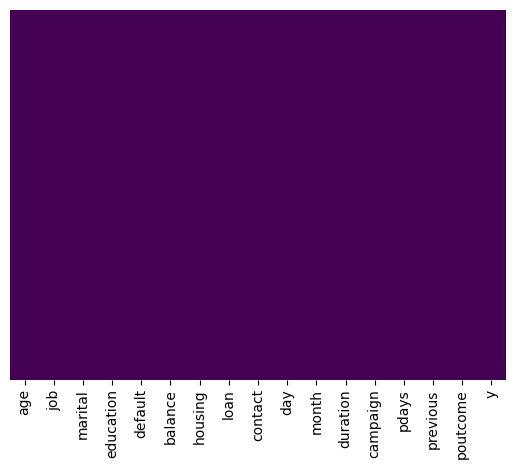

In [8]:
# plotting null values in a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_raw.isnull(), yticklabels=False, cbar=False, cmap='viridis')

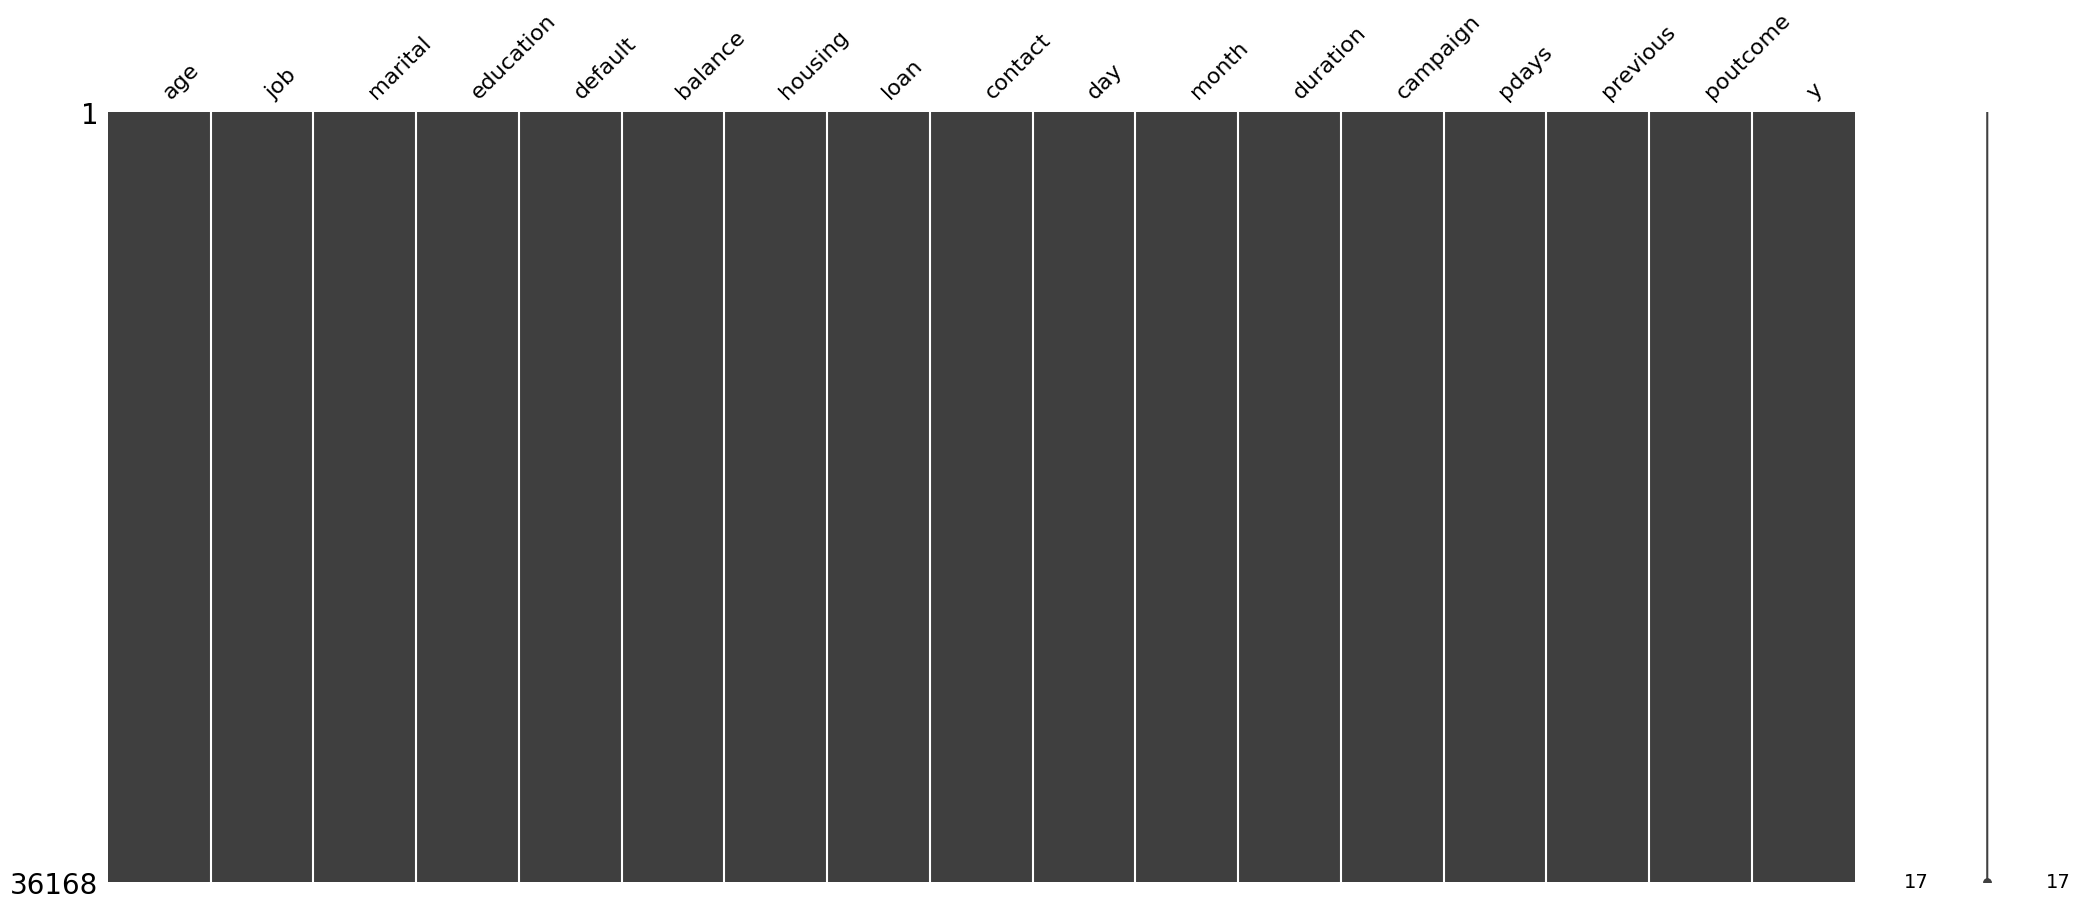

In [9]:
import missingno as ms

ms.matrix(df_raw)
plt.show()

From the plot above, we can conclude that incompleteness error is not an issue in this dataset as all features have non-null values.

In [10]:
# check the data types of the columns
df_raw.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
# check that all the values in the columns with 'object' data type are strings
string_column = []

for column in df_raw.select_dtypes("object").columns:
  string_column.append([column, df_raw[column].apply(lambda x: isinstance(x, str)).all()])

df_string_column = pd.DataFrame([[row[1]] for row in string_column], columns=['is_string_column'], index=[row[0] for row in string_column])

df_string_column

,is_string_column
job,True
marital,True
education,True
default,True
housing,True
loan,True
contact,True
month,True
poutcome,True
y,True


Based on the results above, we can see that the numerical columns are all of `integer` type. For the columns of type `object`, we have verified that all values are of type `string`. Hence, non-uniformity error does not seem to an issue since the data types for each column are consistent. Later on, we will see that the string values are also type-consistent, meaning they're all lowercase.

In [12]:
# check the statistics of the dataset's numeric columns
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36168.0,40.942076,10.616610,18.0,33.0,39.0,48.00,95.0
balance,36168.0,1365.055989,3098.191637,-8019.0,72.0,448.0,1422.25,102127.0
day,36168.0,15.778534,8.313360,1.0,8.0,16.0,21.00,31.0
duration,36168.0,258.363166,257.188052,0.0,103.0,180.0,320.00,4918.0
campaign,36168.0,2.769907,3.119367,1.0,1.0,2.0,3.00,63.0
pdays,36168.0,39.749889,99.547099,-1.0,-1.0,-1.0,-1.00,871.0
previous,36168.0,0.579601,2.384831,0.0,0.0,0.0,0.00,275.0


To check for invalidity errors in the numerical data summary, let us examine whether any of the numerical variables have values that are outside of a meaningful range.

*   `age` : the age column appears to be within a reasonable range, with a minimum of 18 and maximum of 95. There are no obvious invalid values for age in this dataset.
*   `balance` : the balance column represents the average yearly balance. While negative balances might be unusual, they are not necessarily invalid, as an overdraft or debt could result in negative balances. However, further investigation may be needed to confirm the validity of these negative balances.
*   `day` : the day column is the day of the month when the client was contacted. The range appears to be valid, as days of the month should fall within 1 and 31.
*   `duration` : the duration variable represents the duration of the last contact in seconds. A minimum duration of 0 seconds may indicate missing or invalid data, as it's highly unlikely that a call had a duration of 0 seconds. Further investigation is needed to address this issue.
*   `campaign` : the campaign variable appears to be within a reasonable range, representing the number of contacts performed during this campaign. A minimum value of 1 is present, which is expected, as the customer would have been contacted at least once for the marketing campaign.
*   `pdays` : while a minimum value of -1 might seem like an anomaly, it is stated that a value of -1 means that the client was not previously contacted. Hence, the values for this column are acceptable.
*   `previous` : this column is the number of contacts made before this campaign. A value greater than 0 is expected, as can be seen in this dataset.

In summary, the numerical data summary suggests that most of the variables are within meaningful ranges. However, further investigation is needed for the "Duration" variable with a minimum value of 0 seconds, as this may indicate potential invalid data. Additionally, negative balances in the "Balance" variable should be examined to determine their validity in the context of the dataset.

In [13]:
df_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
# check for unique values in columns with values that are non-numerical
unique_values = []

for column in df_raw.select_dtypes("object").columns:
  unique_values.append([column, df_raw[column].unique()])

df_unique = pd.DataFrame([[row[1]] for row in unique_values], columns=['unique_values'], index=[row[0] for row in unique_values])

df_unique

,unique_values
job,"[technician, management, admin., services, blu..."
marital,"[divorced, married, single]"
education,"[secondary, tertiary, primary, unknown]"
default,"[no, yes]"
housing,"[yes, no]"
loan,"[yes, no]"
contact,"[cellular, unknown, telephone]"
month,"[jul, may, jun, apr, feb, jan, aug, nov, dec, ..."
poutcome,"[unknown, other, failure, success]"
y,"[no, yes]"


We can see that in the table above, there are a few columns with `unknown` values. These columns are `job`, `education`, `contact` and `poutcome`. This may indicate *inaccuracy error* in the dataset as the data are not a measure of the true value.

*   `job` : the "unknown" value may indicate inaccuracy if it represents missing or unspecified job information. It would be better to have a specific category for cases where the job is unknown or unspecified. We can expect every person would have a `job` value that belongs to one of the job groups; even if they are unemployed, a student or are retired, it should be captured in one of the other values.
*   `education` : Likewise, every person would have `education` value; if someone has zero education, that should be captured in the dataset.
*   `contact` : it is possible that a person may not have any means of contact or a contact device. However, this dataset was collected from prior bank marketing campaigns that were based on phone calls, which means that the customer was contacted by the marketing agent through telephone. Hence, that method of contact should be a value other than unknown.
*   `poutcome` : this field should also have a value that's known, as the outcome of the previous marketing campaign would be known. The "unknown" value may represent cases where the outcome of the previous marketing campaign is genuinely unknown or missing. However, it's crucial to ensure that this category accurately reflects the data's state.


Let us view the breakdown of the value counts for these columns.

In [15]:
# get value count of 'unknown' for column
columns_with_unknown = ['job', 'education', 'contact', 'poutcome']
unknown_count = []

for column in columns_with_unknown:
  count = df_raw[column].value_counts()['unknown']
  unknown_count.append([column, count, (count/df_raw[column].count())*100])

df_unknown = pd.DataFrame(unknown_count, columns=['field', 'unknown_count', 'unknown_count_%'])

df_unknown

,field,unknown_count,unknown_count_%
0,job,232,0.641451
1,education,1496,4.136253
2,contact,10458,28.915063
3,poutcome,29623,81.903893


While unknown values values make up a relatively small proportion of the `job` and `education` fields (0.64% and 4.13%, respectively), it is a high proportion of values for the `contact` and `poutcome` fields, with 28.9% and 81.9% of all rows, respectively.

The presence of unknown values in the `job` and `education` columns, while not insignificant, is relatively manageable. However, the high prevalence of unknown values in the `contact` and `poutcome` columns is a cause for concern. Further investigation is necessary to validate the accuracy of these unknown values and to determine whether they genuinely represent missing or unspecified information or if there are data quality issues that need to be addressed.

In [16]:
# check for duplicate data
df_raw.duplicated().any()

False

There do not seem to be any duplicated rows in our dataset. Hence, duplication error is not an issue affecting our dataset.

Another point to note for the the non-uniformity error we had discussed earlier is that all values in the string columns are lowercased, further indicating that the values are all of consistent type. Hence, non-uniformity error is not an issue in this dataset.



#### 3.3 Data Wrangling (Preprocessing)

To make structured data ready for analyses, the data should be preprocessed. Data preprocessing primarily includes transformations and scaling of the data. These processes are exercised on the cleansed dataset. Common practice is to apply for the following transformations:

*   *Extraction:* A new variable can be extracted from the current variable for ease of analyzing and using for training the ML model. In our dataset, one possible variable we could extract is the day of the week that the client was contacted (eg. sunday, monday, ..., saturday). However since we have only the `day` and `month` columns with no year, we are not able to extract this feature. One feature that can can extract though is whether a customer was previously contacted or not. This would be from the `pdays` column. The extracted feature, `pdays_binary`, would be a binary variable. This may be useful later on during feature selection and model training.
*   *Aggregation:* Two or more variables can be aggregated into one variable to consolidate similar variables. In our case, we will not aggregate any columns.
*   *Filtration:* The data rows that are not needed for the project must be identified and filtered. In our case, we will use all data rows available.
*   *Selection:* The data columns that are intuitively not needed for the project can be removed. This is different from feature selection, which is part of the data exploration step.
*   *Conversion:* The variables can be of different types: nominal, ordinal, continuous, and categorical. The variables in the dataset must be converted into appropriate types to further process and analyze them correctly. This is critical for ML model training. Before converting, values must be stripped out with prefixes and suffixes, such as currency symbols. In our case, most columns are given in an appropriate data type. One conversion we can perform is to convert the month column from categorical values into nominal values, ie. convert the strings into month numbers.

In [17]:
# making a copy of the df_raw dataset
df_preprocessed = df_raw.copy()
df_test_preprocessed = df_test_raw.copy()

def extract_pdays_binary(x):
  return 'no' if x == -1 else 'yes'

# extracting the 'pdays_binary' variable
df_preprocessed['pdays_binary'] = df_preprocessed['pdays'].map(lambda x: extract_pdays_binary(x))
df_test_preprocessed['pdays_binary'] = df_test_preprocessed['pdays'].map(lambda x: extract_pdays_binary(x))

# moving the new column to after the 'pdays' column
col_list = df_raw.columns.tolist()
col_list.insert(col_list.index('pdays') + 1, 'pdays_binary')
df_preprocessed = df_preprocessed[col_list]

col_list = df_test_raw.columns.tolist()
col_list.insert(col_list.index('pdays') + 1, 'pdays_binary')
df_test_preprocessed = df_test_preprocessed[col_list]

# # mapping dictionary for month names to month numbers
# month_mapping = {
#     'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
#     'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
#     'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
# }

# # apply the mapping to the 'month' column
# df_preprocessed['month'] = df_preprocessed['month'].map(month_mapping)
# df_test_preprocessed['month'] = df_test_preprocessed['month'].map(month_mapping)

df_preprocessed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,pdays_binary,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,no,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,no,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,no,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,no,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,no,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,yes,1,failure,no
36164,60,blue-collar,married,secondary,no,171,yes,no,unknown,19,may,219,2,-1,no,0,unknown,no
36165,41,technician,married,secondary,no,-274,yes,no,unknown,27,may,182,3,-1,no,0,unknown,no
36166,45,blue-collar,married,primary,no,103,no,no,cellular,28,jan,64,3,-1,no,0,unknown,no


# 4. Data Exploration

In this step, the prepared data is explored to investigate and comprehend data distributions and relationships. The knowledge that is gained about the data in this stage is used throughout the project. The outcome and quality of exploration strongly affects ML model training results.

Data exploration involves three important tasks: exploratory data analysis, feature selection, and feature engineering.

*   **Exploratory Data Analysis (EDA):** This is the preliminary step in data exploration. Exploratory graphs, charts, and other visualizations, such as heat maps and word clouds, are designed to summarize and observe data. An important objective of EDA in a real-world ML project is to serve as a communication medium among project stakeholders, including business users, domain experts, and analysts. Relatively quick and easy exploratory visualizations help stakeholders connect and ensure the prepared data are sensible.

*   **Feature Selection:** This is a process whereby only pertinent features from the dataset are selected for ML model training. Selecting fewer features decreases ML model complexity and training time.

*   **Feature Engineering:** This is a process of creating new features by changing or transforming existing features. Model performance heavily depends on feature selection and engineering.


#### 4.1 Exploratory Data Analysis

For the structured dataset we have, each data table row contains an observation and each column contains a feature. We will perform EDA on multiple features as our dataset is multi-dimensional.


##### 4.1.1 Univariate Data Visualization

We will begin by looking at the distribution of data, specifically the distribution of the target variable, 'y'

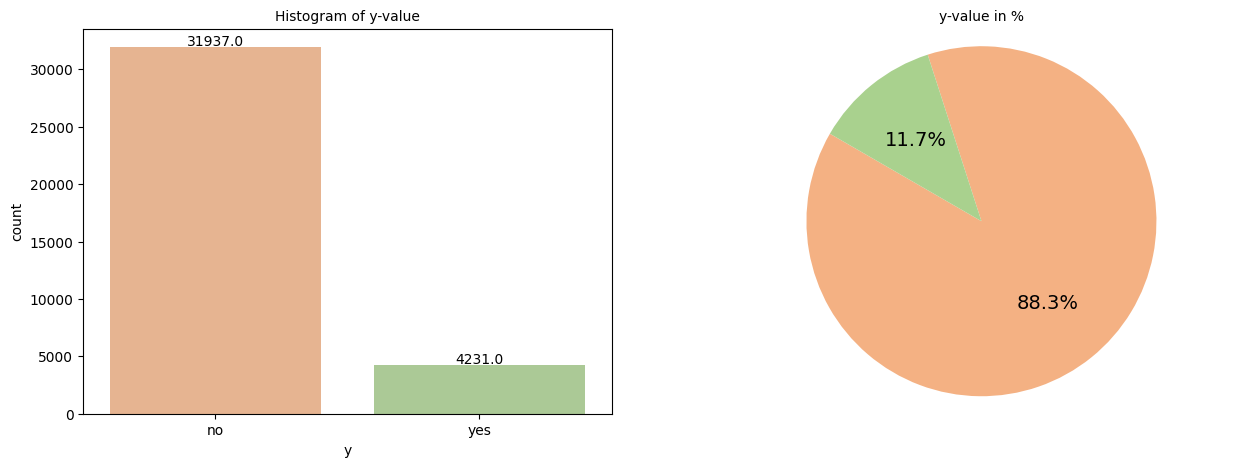

In [18]:
# make a copy of df_preprocessed
df_eda = df_preprocessed.copy()

colors = {'no': '#F4B183', 'yes': '#A9D18E'}

# the number of Subscribes users
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Histogram of y-value', fontsize=10)
s = sns.countplot(x='y', data=df_eda, palette=colors)

for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 4),
                textcoords = 'offset points')


ax = plt.subplot(122)
mush_classpie = df_eda['y'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
plt.title('y-value in %', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, colors=list(colors.values()),
        autopct='%1.1f%%', shadow=False, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

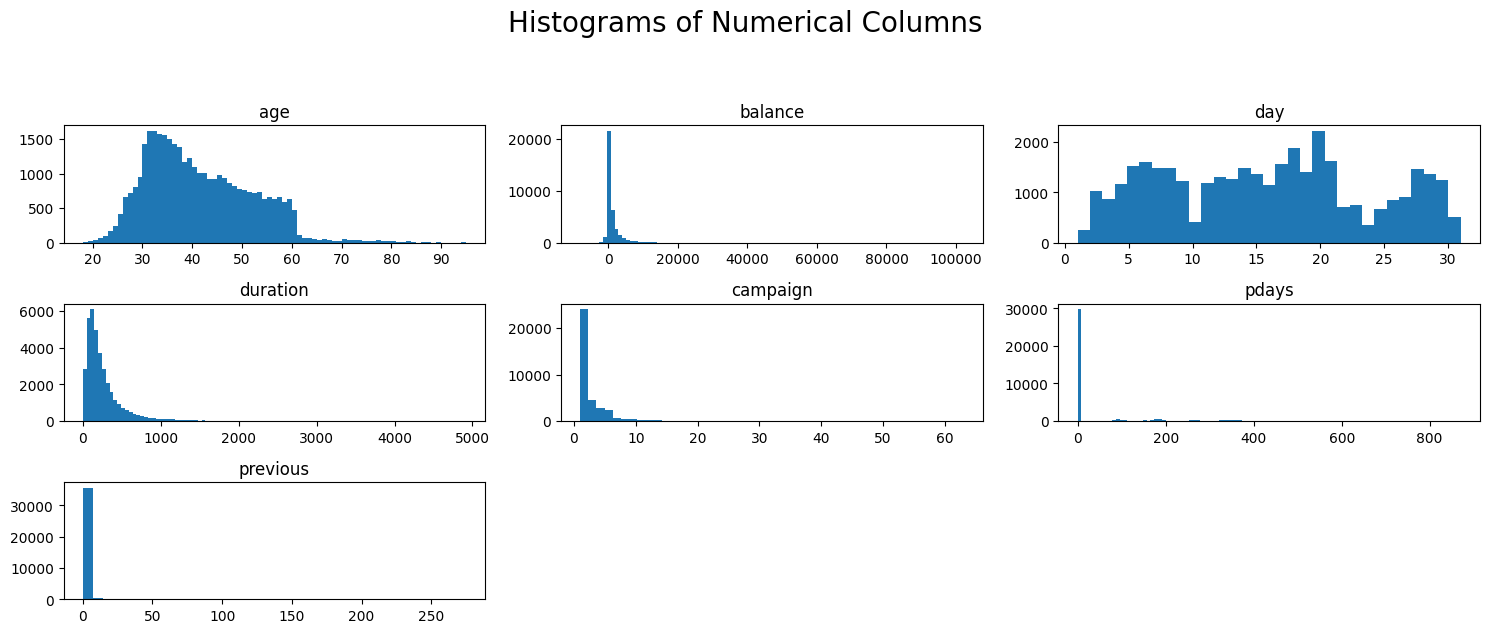

In [19]:
# get numerical columns
numerical_columns = df_eda.select_dtypes("int").columns.tolist()

# plot histograms of the numerical columns
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

i = 0
for column in numerical_columns:
  plt.subplot(6, 3, i + 1)
  f = plt.gca()
  f.set_title(column)

  vals = np.size(df_eda[column].unique())
  if vals >= 100:
      vals = 100

  plt.hist(df_eda[column], bins=vals)
  i += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

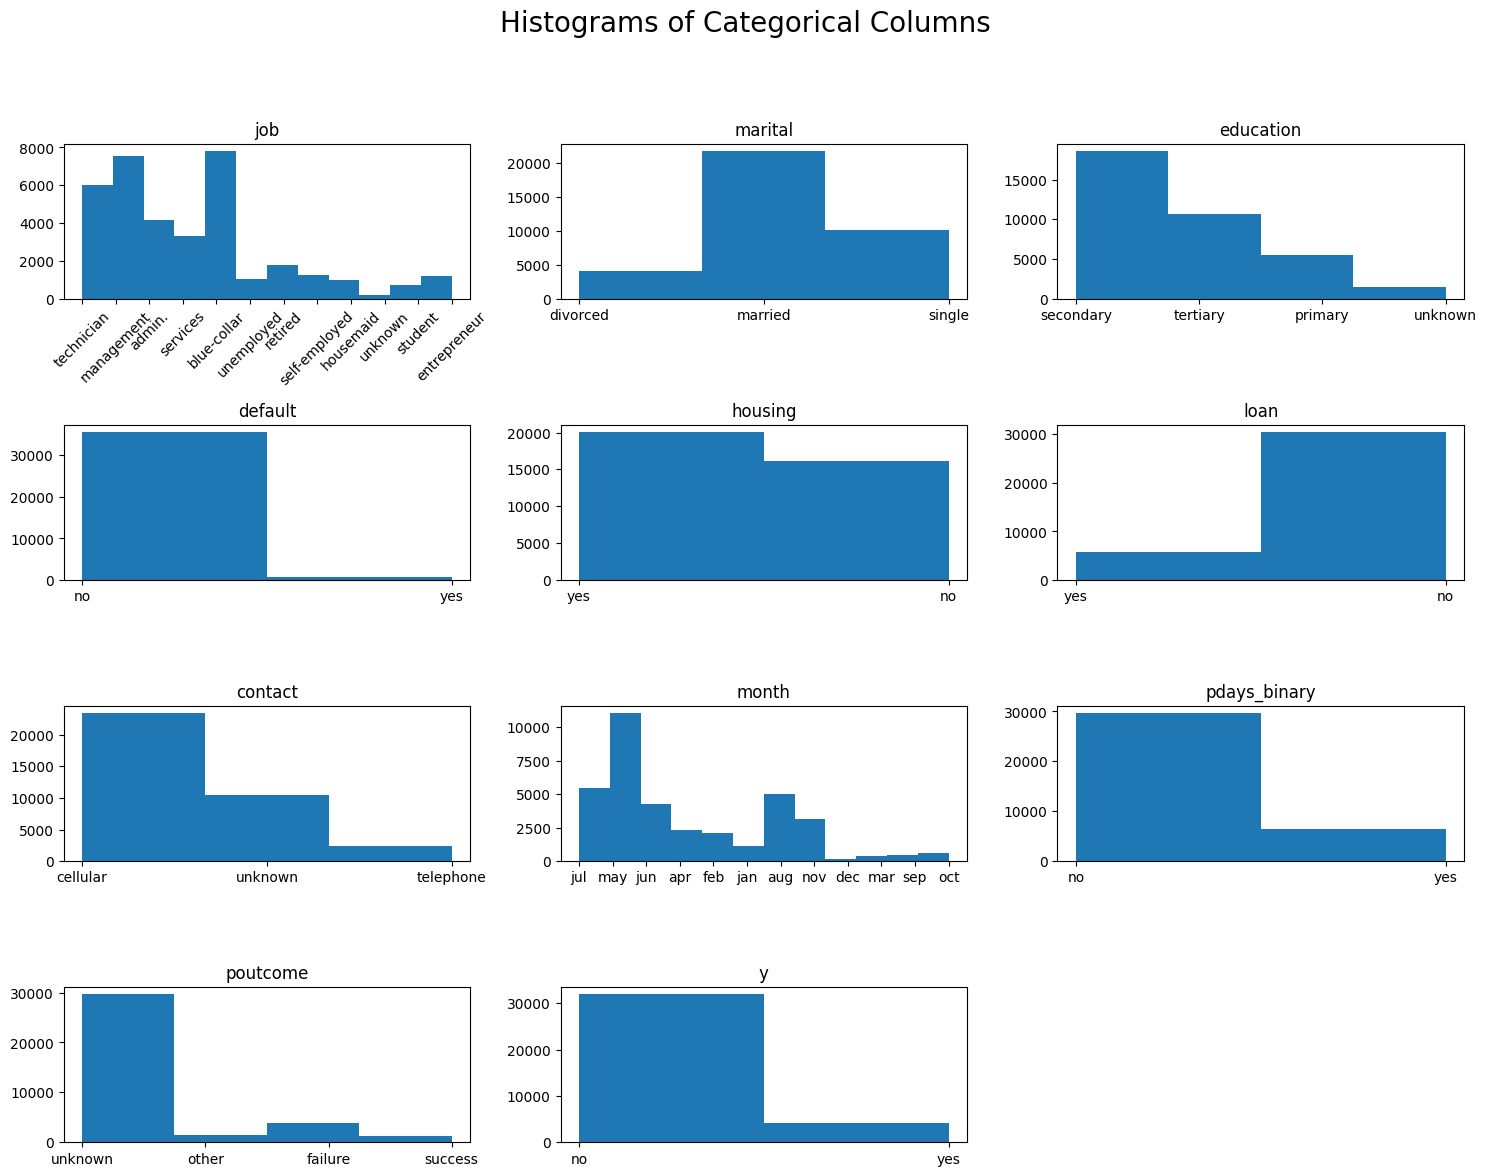

In [20]:
# get categorical columns
categorical_columns = df_eda.select_dtypes("object").columns.tolist()

# plot histograms of the numerical columns
fig = plt.figure(figsize=(15, 18))
plt.suptitle('Histograms of Categorical Columns', fontsize=20)

i = 0
for column in categorical_columns:
  plt.subplot(6, 3, i + 1)
  f = plt.gca()
  f.set_title(column)

  vals = np.size(df_eda[column].unique())
  if vals >= 100:
      vals = 100

  plt.hist(df_eda[column], bins=vals)
  if column == 'job':
    plt.xticks(rotation=45)
  i += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

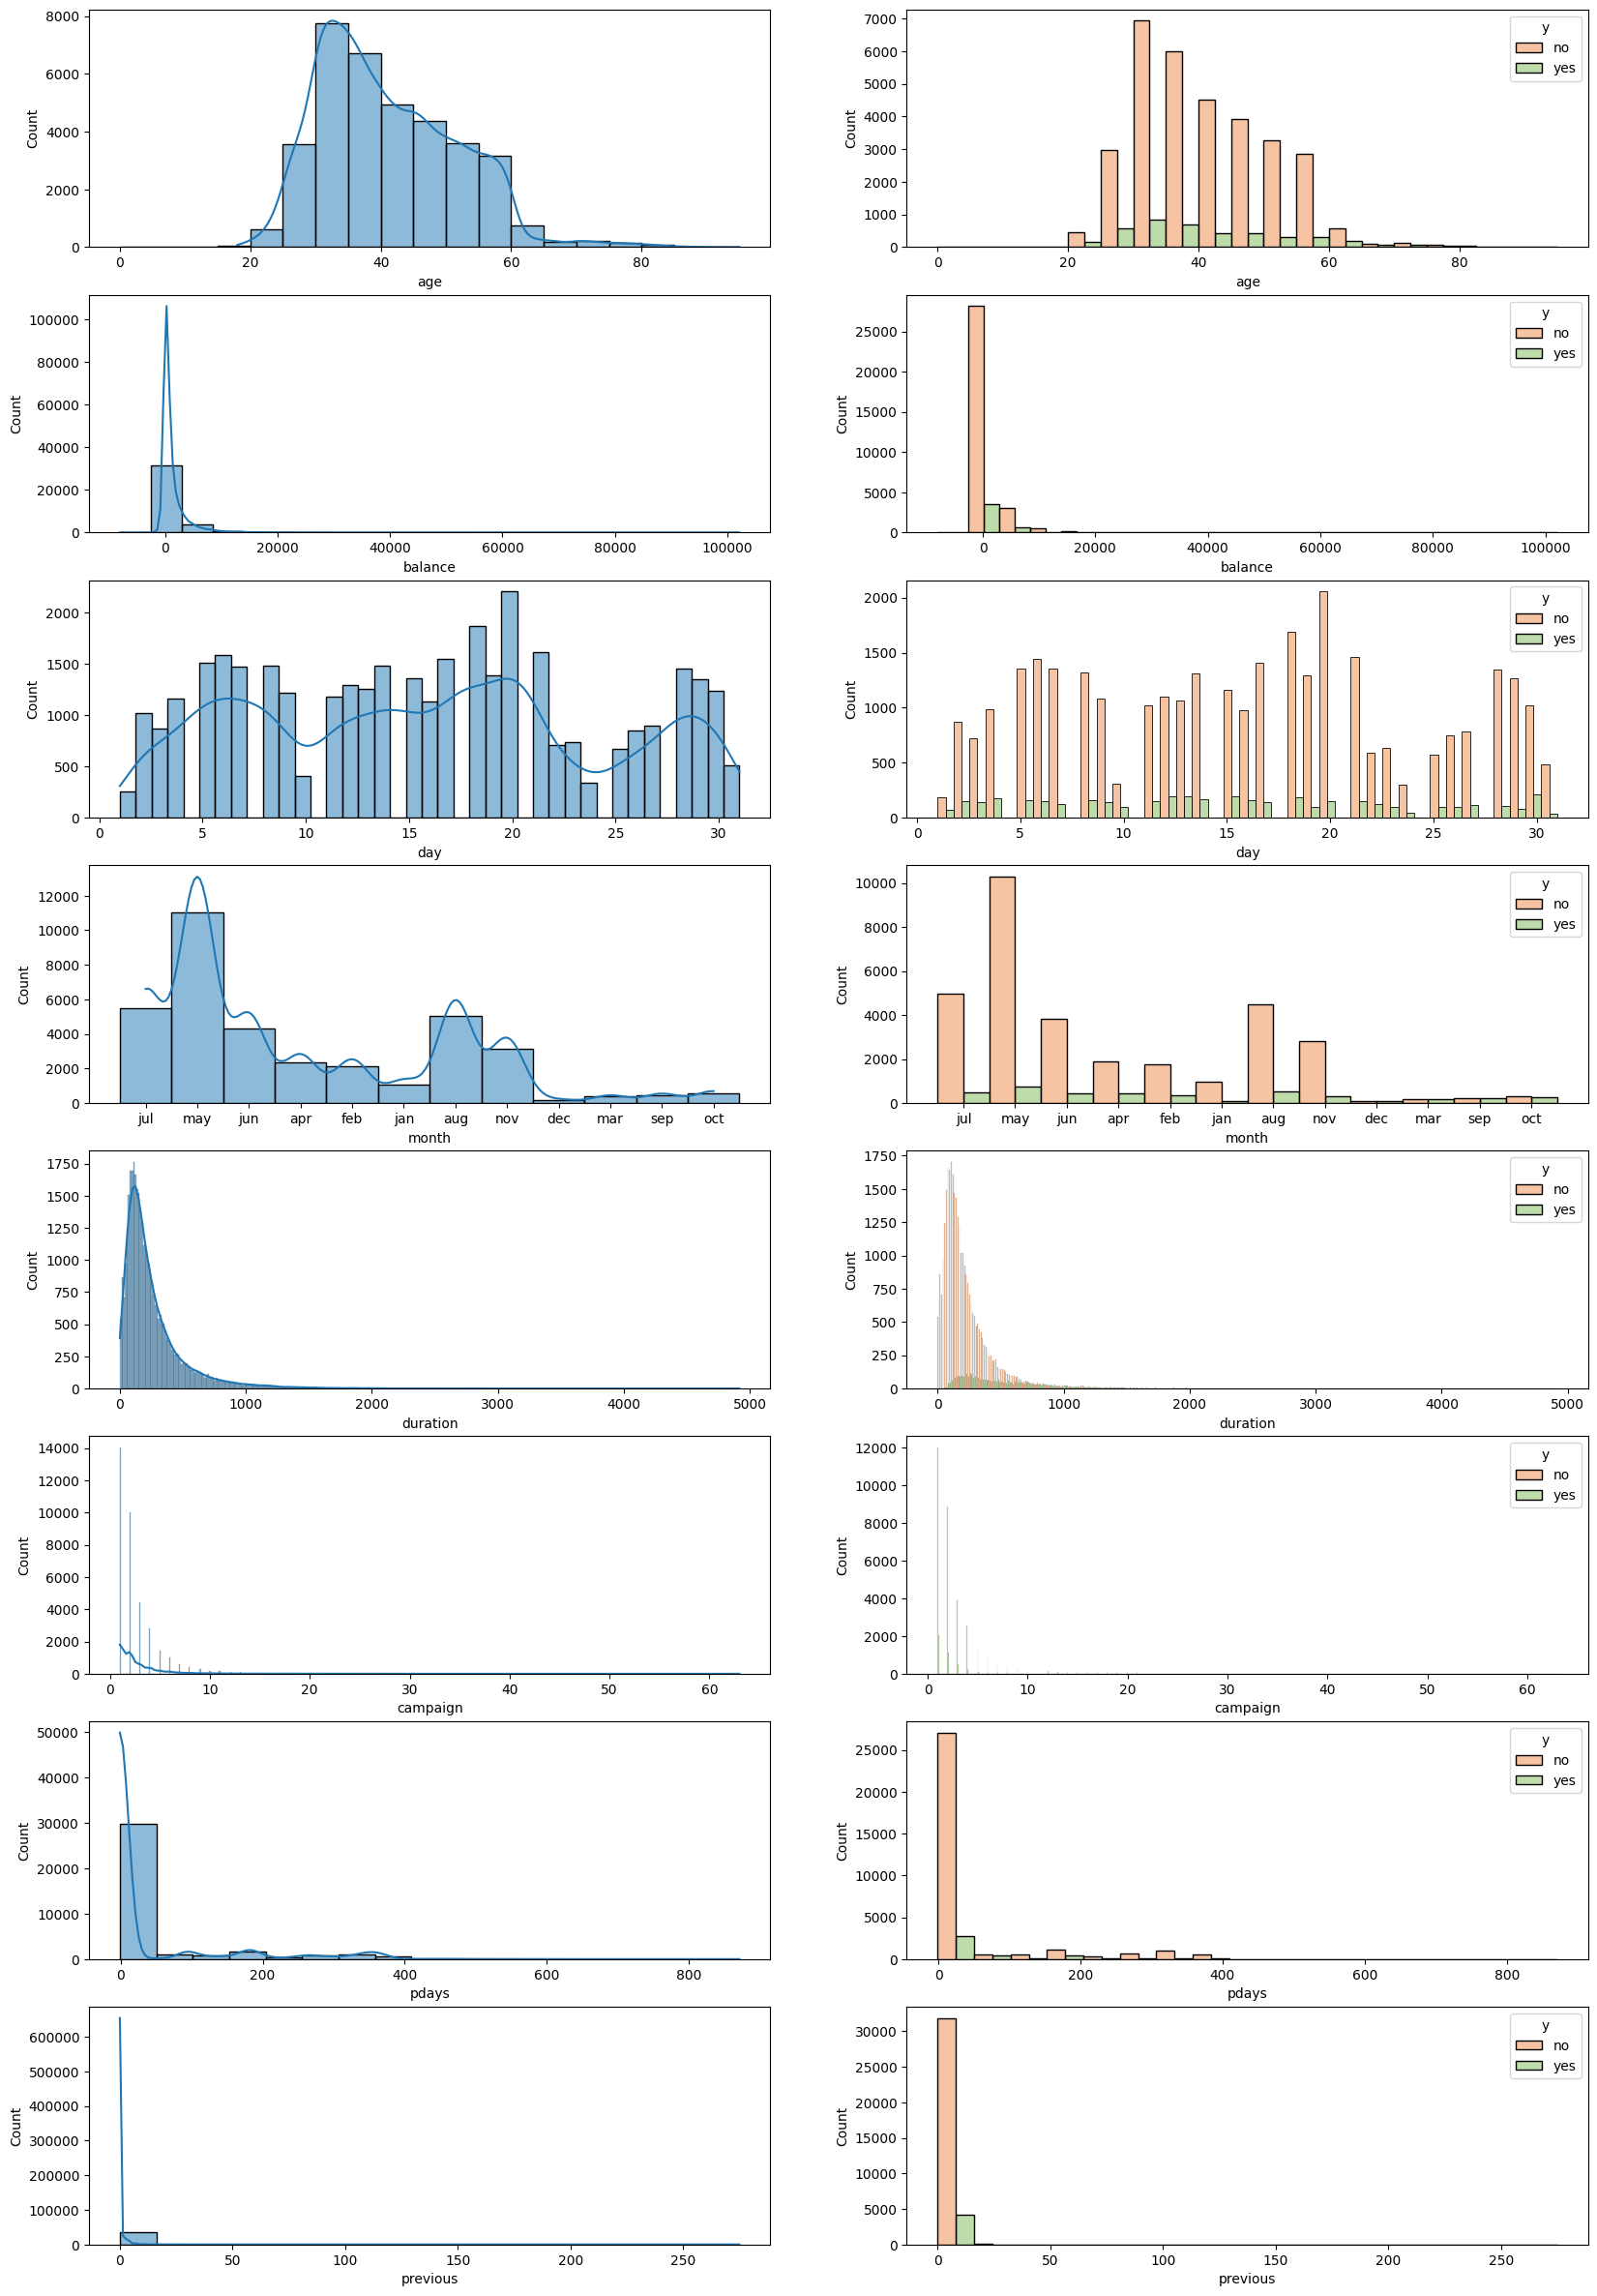

In [21]:
# plotting distribution of numerical variables
fig, ax = plt.subplots(8, 2, figsize=(20, 30))

# age
age_bins = range(0, 100, 5)
sns.histplot(data=df_preprocessed, x='age', bins=age_bins, kde=True, ax=ax[0][0])
sns.histplot(data=df_preprocessed, x='age', hue='y', multiple='dodge', bins=age_bins, palette=colors,  ax=ax[0][1])

# balance
sns.histplot(data=df_preprocessed, x='balance', bins=20, kde=True, ax=ax[1][0])
sns.histplot(data=df_preprocessed, x='balance', hue='y', multiple='dodge', bins=20, palette=colors,  ax=ax[1][1])

# day
sns.histplot(data=df_preprocessed, x='day', kde=True, ax=ax[2][0])
sns.histplot(data=df_preprocessed, x='day', hue='y', multiple='dodge', palette=colors,  ax=ax[2][1])

# month
sns.histplot(data=df_preprocessed, x='month', kde=True, ax=ax[3][0])
sns.histplot(data=df_preprocessed, x='month', hue='y', multiple='dodge', palette=colors,  ax=ax[3][1])

# duration
sns.histplot(data=df_preprocessed, x='duration', kde=True, ax=ax[4][0])
sns.histplot(data=df_preprocessed, x='duration', hue='y', multiple='dodge', palette=colors,  ax=ax[4][1])

# campaign
sns.histplot(data=df_preprocessed, x='campaign', kde=True, ax=ax[5][0])
sns.histplot(data=df_preprocessed, x='campaign', hue='y', multiple='dodge', palette=colors,  ax=ax[5][1])

# pdays
sns.histplot(data=df_preprocessed, x='pdays', kde=True, ax=ax[6][0])
sns.histplot(data=df_preprocessed, x='pdays', hue='y', multiple='dodge', palette=colors,  ax=ax[6][1])

# previous
sns.histplot(data=df_preprocessed, x='previous', kde=True, ax=ax[7][0])
sns.histplot(data=df_preprocessed, x='previous', hue='y', multiple='dodge', palette=colors,  ax=ax[7][1])

fig.show()

In [22]:
df_preprocessed.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
pdays_binary    object
previous         int64
poutcome        object
y               object
dtype: object

<ipython-input-23-6c8ce2a900fc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
<ipython-input-23-6c8ce2a900fc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt11.set_xticklabels(plt11.get_xticklabels(), rotation=45)


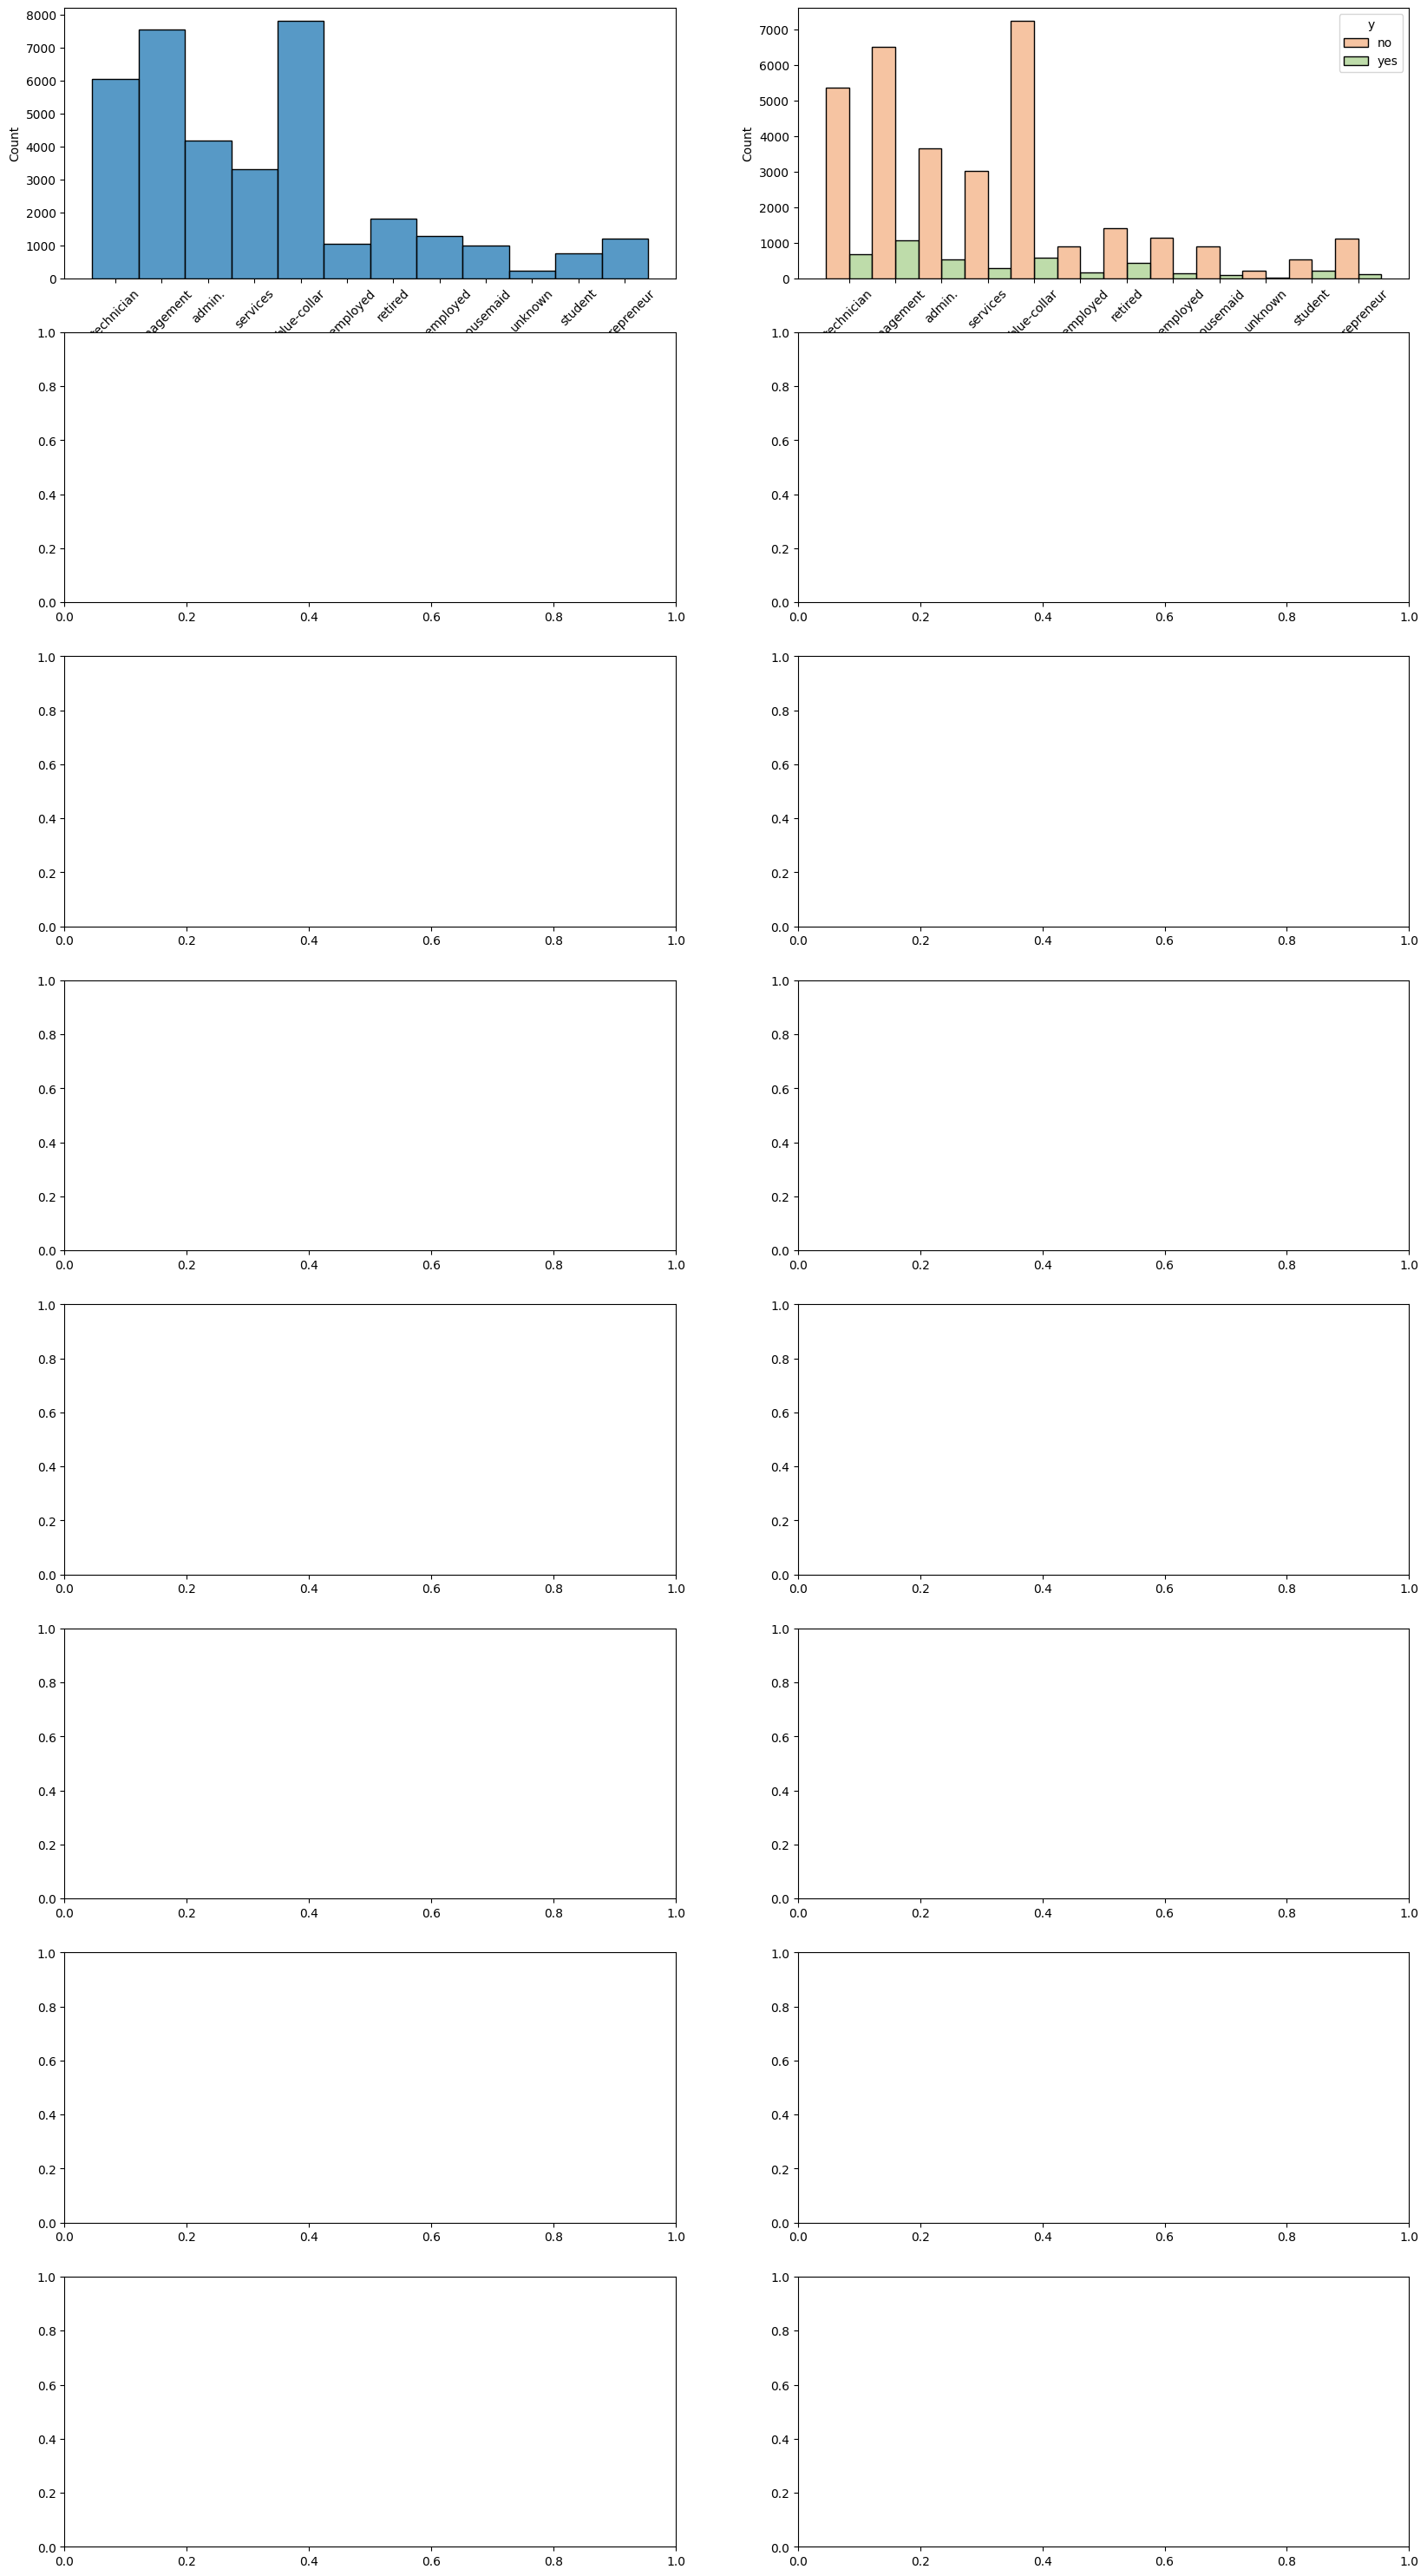

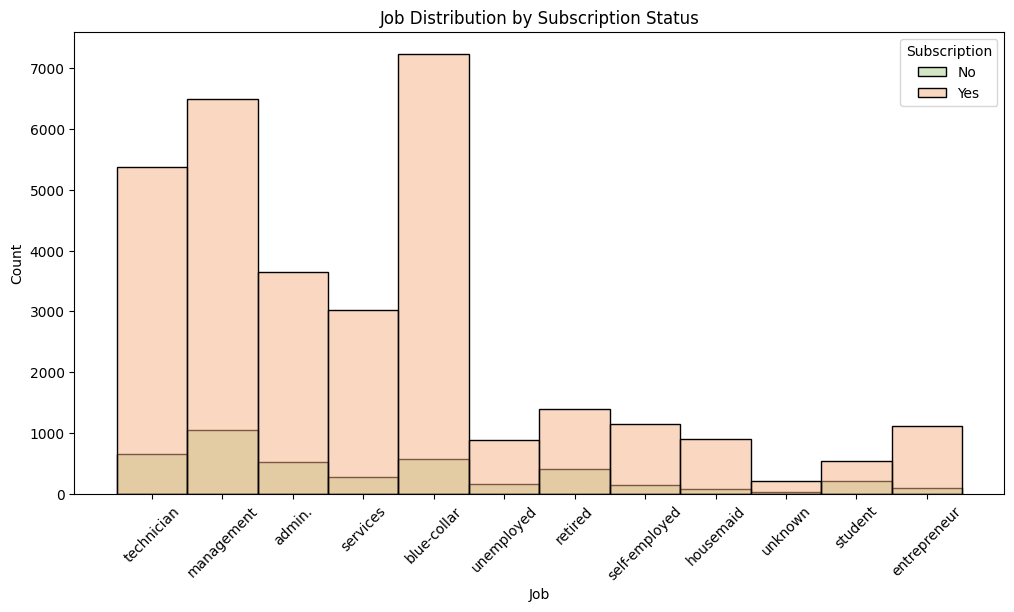

In [23]:
fig_c, ax_c = plt.subplots(8, 2, figsize=(20, 38))

# job
plt1 = sns.histplot(data=df_preprocessed, x='job', ax=ax_c[0][0])
plt11 = sns.histplot(data=df_preprocessed, x='job', hue='y', multiple='dodge', palette=colors,  ax=ax_c[0][1])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt11.set_xticklabels(plt11.get_xticklabels(), rotation=45)


# education

# default

# housing

# loan

# contact

# month

plt.show()

# Count Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df_preprocessed, x='job', hue='y', palette=colors)
plt.title('Job Distribution by Subscription Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()

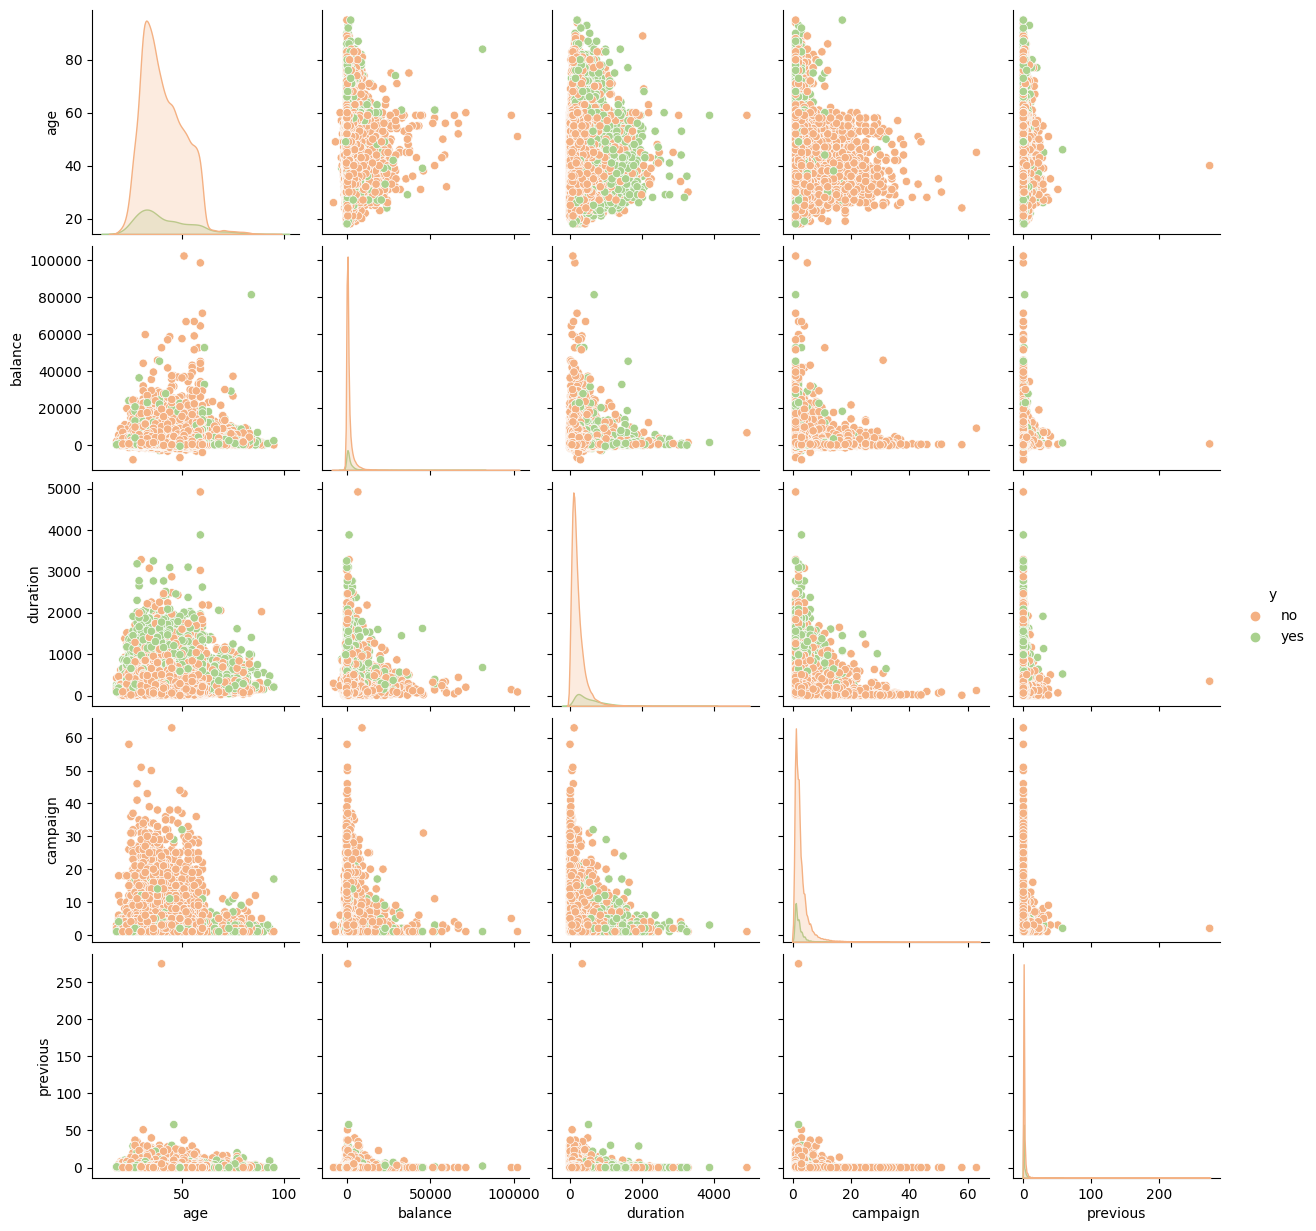

In [24]:
sns.pairplot(data=df_preprocessed, hue='y', vars= ['age', 'balance', 'duration', 'campaign', 'previous'], palette=colors)

<ipython-input-25-695693428c2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_eda.corr()


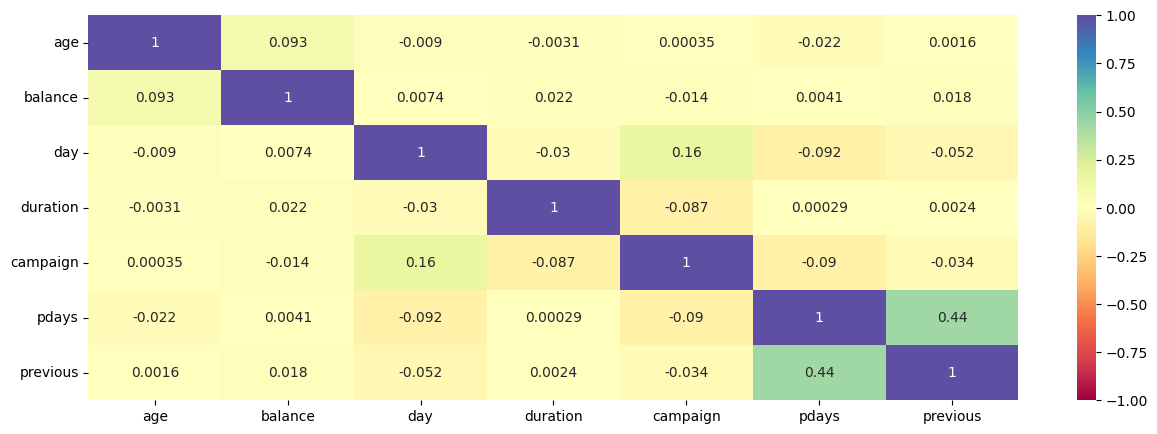

In [25]:
corr = df_eda.corr()
sns.heatmap(corr, cmap='Spectral', annot=True, vmax=1, vmin=-1)
plt.show()

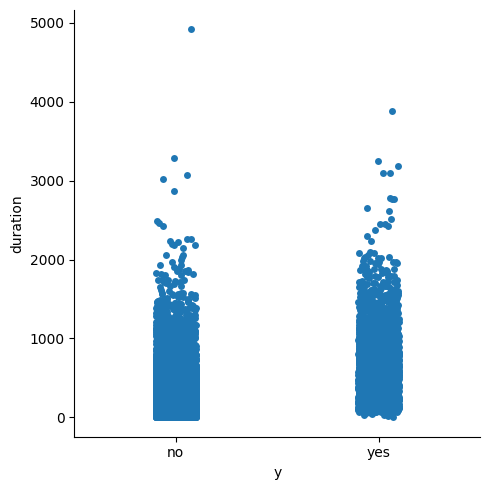

In [26]:
# duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output
# target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after
# the end of the call y is obviously known.
# Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have
# a realistic predictive model.

sns.catplot(data=df_preprocessed, x='y', y='duration')

#### 4.2 Feature Selection

Structured data consist of features, represented by different columns of data in a table or matrix. After using EDA to discover relevant patterns in the data, it is essential to identify and remove unneeded, irrelevant, and redundant features. Basic diagnostic testing should also be performed on features to identify redundancy, heteroskedasticity, and multi-collinearity. The objective of the feature selection process is to assist in identifying significant features that when used in a model retain the important patterns and complexities of the larger dataset while requiring fewer data overall. This last point is important since computing power is not free (i.e., explicit costs and processing time).

##### 4.2.1 Numerical Feature Selection

In [27]:
# Find the numerical features
#----------------------------
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = df_preprocessed.select_dtypes(include=numerics).columns.tolist()

# Numerical Features
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [28]:
# Create a correlation matrix
corr_metrics = df_preprocessed[num_features].corr(method='pearson')
corr_metrics.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.093403,-0.008967,-0.003116,0.000354,-0.022179,0.001556
balance,0.093403,1.000000,0.007385,0.022069,-0.014053,0.004141,0.017863
day,-0.008967,0.007385,1.000000,-0.030053,0.163619,-0.091943,-0.051983
duration,-0.003116,0.022069,-0.030053,1.000000,-0.086969,0.000291,0.002381
campaign,0.000354,-0.014053,0.163619,-0.086969,1.000000,-0.089526,-0.033579
pdays,-0.022179,0.004141,-0.091943,0.000291,-0.089526,1.000000,0.437361
previous,0.001556,0.017863,-0.051983,0.002381,-0.033579,0.437361,1.000000


##### 4.2.2 Categorical Feature Selection

In [29]:
# Find the categorical variables
#-------------------------------
objects = ['object','category', 'bool']
cat_features = df_preprocessed.select_dtypes(include=objects).columns.tolist()

# Remove the target varible
cat_features.remove('y')

# Categorical Features
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'pdays_binary',
 'poutcome']

In [30]:
df_postprocessed = df_preprocessed.copy()
df_test_postprocessed = df_test_preprocessed.copy()

# df_postprocessed = df_eda.copy().drop(columns=['day'])
# df_test_postprocessed = df_test_preprocessed.copy().drop(columns=['day'])

# yes-no encoding
target_mapping = {'no': 0, 'yes': 1}

columns_to_map = ['pdays_binary', 'y']

for column in columns_to_map:
  # # check if the column is an object type and if the values in a column are exclusively 'yes' and 'no'
  # if (df_postprocessed[column].dtype == 'object' and set(df_postprocessed[column].unique().tolist()) == {'yes', 'no'}):
  #   # encode yes-no column values as 1-0
  df_postprocessed[column] = df_postprocessed[column].map(target_mapping)
  df_test_postprocessed[column] = df_test_postprocessed[column].map(target_mapping)

df_postprocessed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,pdays_binary,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,0,unknown,0
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,0,unknown,0
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,0,unknown,0
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,0,unknown,0
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,1,1,failure,0
36164,60,blue-collar,married,secondary,no,171,yes,no,unknown,19,may,219,2,-1,0,0,unknown,0
36165,41,technician,married,secondary,no,-274,yes,no,unknown,27,may,182,3,-1,0,0,unknown,0
36166,45,blue-collar,married,primary,no,103,no,no,cellular,28,jan,64,3,-1,0,0,unknown,0


In [31]:
corr_metrics = df_postprocessed.corr(method='pearson', numeric_only=True)
corr_metrics.style.background_gradient()

,age,balance,day,duration,campaign,pdays,pdays_binary,previous,y
age,1.000000,0.093403,-0.008967,-0.003116,0.000354,-0.022179,0.004405,0.001556,0.021976
balance,0.093403,1.000000,0.007385,0.022069,-0.014053,0.004141,0.029084,0.017863,0.048057
day,-0.008967,0.007385,1.000000,-0.030053,0.163619,-0.091943,-0.084431,-0.051983,-0.030527
duration,-0.003116,0.022069,-0.030053,1.000000,-0.086969,0.000291,0.006192,0.002381,0.401466
campaign,0.000354,-0.014053,0.163619,-0.086969,1.000000,-0.089526,-0.108970,-0.033579,-0.072407
pdays,-0.022179,0.004141,-0.091943,0.000291,-0.089526,1.000000,0.870566,0.437361,0.106851
pdays_binary,0.004405,0.029084,-0.084431,0.006192,-0.108970,0.870566,1.000000,0.516863,0.168195
previous,0.001556,0.017863,-0.051983,0.002381,-0.033579,0.437361,0.516863,1.000000,0.088729
y,0.021976,0.048057,-0.030527,0.401466,-0.072407,0.106851,0.168195,0.088729,1.000000


In [32]:
df_postprocessed = df_postprocessed.drop(columns=['pdays_binary'])
df_test_postprocessed = df_test_postprocessed.drop(columns=['pdays_binary'])

df_postprocessed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,0
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,0
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,0
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,0
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,no,1243,yes,no,telephone,13,nov,86,1,174,1,failure,0
36164,60,blue-collar,married,secondary,no,171,yes,no,unknown,19,may,219,2,-1,0,unknown,0
36165,41,technician,married,secondary,no,-274,yes,no,unknown,27,may,182,3,-1,0,unknown,0
36166,45,blue-collar,married,primary,no,103,no,no,cellular,28,jan,64,3,-1,0,unknown,0


#### 4.3 Feature Engineering

After the appropriate features are selected, feature engineering helps further optimize and improve the features. The success of ML model training depends on how well the data are presented to the model. The feature engineering process attempts to produce good features that describe the structures inherent in the dataset. This process depends on the context of the project, domain of the data, and nature of the problem. Structured data are likely to contain quantities, which can be engineered to better present relevant patterns in the dataset. This action involves engineering an existing feature into a new feature or decomposing it into multiple features.

For continuous data, a new feature may be created. For categorical data, a new feature can be a combination (e.g., sum or product) of two features or a decomposition of one feature into many. The process in which categorical variables are converted into binary form (0 or 1) for machine reading is called one **hot encoding.** It is one of the most common methods for handling categorical features in text data.


In [33]:
# one-hot encoding
df_one_hot_encoded = pd.get_dummies(df_postprocessed)
df_test_one_hot_encoded = pd.get_dummies(df_test_postprocessed)

df_one_hot_encoded

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,42,-78,29,10,23,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,50,106,15,388,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,47,407,5,67,12,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,39,952,16,62,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,30,364,30,306,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,1243,13,86,1,174,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
36164,60,171,19,219,2,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
36165,41,-274,27,182,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
36166,45,103,28,64,3,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  """
  the function calculates the Variance Inflation Factor (VIF) for each feature in the training data and stores the results in a DataFrame.
  it then displays the DataFrame containing the VIF values
  """
  # create an empty DataFrame to store VIF values for each feature
  vif_data = pd.DataFrame()

  X_vif = data

  # assign feature names to the 'feature' column of the DataFrame
  vif_data['feature'] = X_vif.columns

  # calculate the VIF for each feature and store the results in the 'VIF' column
  # the VIF measures multicollinearity by assessing how much the variance of the estimated regression coefficients is increased due to collinearity
  vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

  # display the DataFrame with VIF values for each feature
  return vif_data


vif_data = calculate_vif(df_one_hot_encoded.drop(columns=['y']))
vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,1.728107
1,balance,1.052060
2,day,1.346726
3,duration,1.018642
4,campaign,1.119691
5,pdays,4.695212
6,previous,1.383337
7,job_admin.,inf
8,job_blue-collar,inf
9,job_entrepreneur,inf


In [35]:
# Find the numerical features
#----------------------------
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = df_eda.select_dtypes(include=numerics).columns.tolist()

# Numerical Features
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [36]:
vif_filtered = vif_data[vif_data['VIF'] > 100]

columns_to_drop = []
dummy_columns_to_drop = []
# dummy_columns_to_drop = ['job_unknown', 'marital_single', 'education_unknown', 'contact_unknown', 'poutcome_unknown']

for column in columns_to_drop:
  if column in num_features:
    num_features.remove(column)

df_encoded_vif_removed = df_one_hot_encoded.drop(columns=(columns_to_drop + dummy_columns_to_drop))
df_test_encoded_vif_removed = df_test_one_hot_encoded.drop(columns=(columns_to_drop + dummy_columns_to_drop))

vif_data_new = calculate_vif(df_encoded_vif_removed.drop(columns=['y']))
vif_data_new

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,1.728107
1,balance,1.052060
2,day,1.346726
3,duration,1.018642
4,campaign,1.119691
5,pdays,4.695212
6,previous,1.383337
7,job_admin.,inf
8,job_blue-collar,inf
9,job_entrepreneur,inf


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

sc_encoded = StandardScaler()

X_train_encoded_unscaled = df_encoded_vif_removed.drop(columns=['y'])
y_train = df_encoded_vif_removed['y']

X_test_encoded_unscaled = df_test_encoded_vif_removed.drop(columns=['y'])
y_test = df_test_encoded_vif_removed['y']

ct = ColumnTransformer(transformers=[('num', sc_encoded, num_features)], remainder='passthrough')

X_train_encoded = pd.DataFrame(ct.fit_transform(X_train_encoded_unscaled), index=X_train_encoded_unscaled.index, columns=X_train_encoded_unscaled.columns)
X_test_encoded = pd.DataFrame(ct.transform(X_test_encoded_unscaled), index=X_test_encoded_unscaled.index, columns=X_test_encoded_unscaled.columns)

X_train_encoded

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,-0.465780,1.590410,-0.965700,6.485410,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.853196,-0.406390,-0.093650,0.504062,-0.246819,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.570616,-0.309235,-1.296549,-0.744070,2.959004,-0.409359,-0.243040,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.182931,-0.133323,0.026640,-0.763511,-0.567401,-0.409359,-0.243040,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.030671,-0.323114,1.710700,0.185224,-0.246819,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-1.030671,-0.039396,-0.334230,-0.670193,-0.567401,1.348628,0.176283,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
36164,1.795129,-0.385410,0.387510,-0.153054,-0.246819,-0.409359,-0.243040,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36165,0.005456,-0.529044,1.349830,-0.296920,0.073764,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36166,0.382229,-0.407358,1.470120,-0.755734,0.073764,-0.409359,-0.243040,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 5. Model Training

The three tasks of ML model training are method selection, performance evaluation, and tuning. The fundamental idea of ML model training is fitting a system of rules on a training dataset to reveal a pattern in the data. In other words, fitting describes the degree to which (or how well) an ML model can be generalized to new data. A good model fit results in good model performance and can be validated using new data outside of the training dataset (i.e., out-of-sample).

*   **Method Selection:** ML model training is a craft (part art and part science); it has no strict guidelines. Selecting and applying a method or an algorithm is the first step of the training process.

*   **Performance Evaluation:** It is important to measure the model training performance or goodness of fit for validation of the model.

*   **Tuning:** Once the model is evaluated, certain decisions and actions must be taken based on the findings to improve the performance of the model.



#### 5.1 Balancing the Dataset

Oversampling

Undersampling

In [38]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the original class distribution
print("Original class distribution:", np.bincount(y_train.values))

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(X_train_encoded, y_train)
print("Class distribution after SMOTE:", np.bincount(y_smote))

# Random oversampling
ros = RandomOverSampler(sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train_encoded, y_train)
print("Class distribution after Random OverSampling:", np.bincount(y_ros))

# Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus, y_rus = rus.fit_resample(X_train_encoded, y_train)
print("Class distribution after Random UnderSampling:", np.bincount(y_rus))

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Original class distribution: [31937  4231]
Class distribution after SMOTE: [31937 31937]
Class distribution after Random OverSampling: [31937 31937]
Class distribution after Random UnderSampling: [4231 4231]


In [39]:
# Choose to use the Random oversampling strategy
X_ros

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,-0.465780,1.590410,-0.965700,6.485410,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.853196,-0.406390,-0.093650,0.504062,-0.246819,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.570616,-0.309235,-1.296549,-0.744070,2.959004,-0.409359,-0.243040,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.182931,-0.133323,0.026640,-0.763511,-0.567401,-0.409359,-0.243040,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.030671,-0.323114,1.710700,0.185224,-0.246819,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,-0.842284,3.616335,-1.777709,1.176730,-0.246819,2.564149,0.595606,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63870,-1.030671,-0.425111,1.109250,-0.160831,-0.567401,1.519403,0.595606,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63871,0.759003,-0.408649,-1.176260,1.666651,-0.246819,3.046340,0.176283,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
63872,2.077709,-0.411231,1.229540,-0.506886,0.073764,-0.409359,-0.243040,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 5.2 Initial Classifier Training

Oversampling

Undersampling

In [40]:
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [48]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score, GridSearchCV

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_ros, y_ros, cv=3)
log_reg_mean = log_scores.mean()

# SVC - using undersampling data
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_rus, y_rus, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_ros, y_ros, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_ros, y_ros, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_ros, y_ros, cv=3)
grad_mean = grad_scores.mean()

# XGBoost Classifier
xgb_clf = XGBClassifier()
grad_scores = cross_val_score(xgb_clf, X_ros, y_ros, cv=3)
xgb_mean = tree_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier()
rand_scores = cross_val_score(rand_clf, X_ros, y_ros, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_ros, y_ros, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_ros, y_ros, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['log_reg', 'svc_clf', 'knn_clf', 'tree_clf', 'grad_clf', 'xgb_clf', 'rand_clf', 'neural_clf', 'nav_clf'],
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean,xgb_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)

result_df

,Classifiers,Crossval Mean Scores
6,rand_clf,0.966121
3,tree_clf,0.956164
5,xgb_clf,0.956164
2,knn_clf,0.910809
4,grad_clf,0.863434
1,svc_clf,0.856653
7,neural_clf,0.853634
8,nav_clf,0.853634
0,log_reg,0.832686


#### 5.3 Training



In [46]:
classifiers = [
    {
        'name': 'log_reg',
        'classifier': LogisticRegression()
    },
    {
        'name': 'svc_clf',
        'classifier': SVC()
    },
    {
        'name': 'knn_clf',
        'classifier': KNeighborsClassifier()
    },
    {
        'name': 'tree_clf',
        'classifier': tree.DecisionTreeClassifier()
    },
    {
        'name': 'grad_clf',
        'classifier': GradientBoostingClassifier()
    },
    {
        'name': 'xgb_clf',
        'classifier': XGBClassifier()
    },
    {
        'name': 'rand_clf',
        'classifier': RandomForestClassifier()
    },
    {
        'name': 'neural_clf',
        'classifier': MLPClassifier(alpha=1)
    },
    {
        'name': 'nav_clf',
        'classifier': GaussianNB()
    }
]


def fit_predict_and_score_classifier(classifier, input_train, target_train, input_test, target_test):
  # fit classifier
  classifier.fit(input_train, target_train)

  # prediction
  target_test_pred = classifier.predict(input_test)

  # metrics
  precision = precision_score(target_test, target_test_pred)
  recall = recall_score(target_test, target_test_pred)
  f1 = f1_score(target_test, target_test_pred)
  accuracy = accuracy_score(target_test, target_test_pred)

  return {
      'precision': precision,
      'recall': recall,
      'f1': f1,
      'accuracy': accuracy
  }


In [47]:
# Fit each machine learning algorithms with default value with data resampling

results = []

for item in classifiers:
  name = item.get('name')
  classifier = item.get('classifier')

  # with data resampling
  metrics_resampling = fit_predict_and_score_classifier(classifier, X_ros, y_ros, X_test_encoded, y_test)

  results.append({
      'Classifier': name,
      'Data Resampling': 'Oversampling',
      'Precision': metrics_resampling.get('precision'),
      'Recall': metrics_resampling.get('recall'),
      'F1 Score': metrics_resampling.get('f1'),
      'Accuracy': metrics_resampling.get('accuracy')
  })


  # without data resampling
  metrics_no_resampling = fit_predict_and_score_classifier(classifier, X_train_encoded, y_train, X_test_encoded, y_test)
  results.append({
      'Classifier': name,
      'Data Resampling': 'No Resampling',
      'Precision': metrics_no_resampling.get('precision'),
      'Recall': metrics_no_resampling.get('recall'),
      'F1 Score': metrics_no_resampling.get('f1'),
      'Accuracy': metrics_no_resampling.get('accuracy')
  })

results_df = pd.DataFrame(results)

results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Classifier,Data Resampling,Precision,Recall,F1 Score,Accuracy
0,log_reg,Oversampling,0.413942,0.813800,0.548757,0.843415
1,log_reg,No Resampling,0.635531,0.327977,0.432668,0.899370
2,svc_clf,Oversampling,0.430913,0.869565,0.576261,0.850382
3,svc_clf,No Resampling,0.643739,0.344991,0.449231,0.901028
4,knn_clf,Oversampling,0.413333,0.703214,0.520644,0.848502
5,knn_clf,No Resampling,0.604839,0.354442,0.446961,0.897379
6,tree_clf,Oversampling,0.474849,0.446125,0.460039,0.877474
7,tree_clf,No Resampling,0.483506,0.484877,0.484191,0.879133
8,grad_clf,Oversampling,0.413112,0.869565,0.560122,0.840208
9,grad_clf,No Resampling,0.650000,0.417769,0.508631,0.905562


#### 5.1 Balancing the Dataset

Oversampling

Undersampling


## Better F1 score with resampling data since imbalanced class
## Better accuacy score without resampling data

In [ ]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rand_clf, param_grid=rand_param_grid,
                           cv=3, n_jobs=-1, scoring='f1')

grid_search.fit(X_ros, y_ros)

'''

"\nparam_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_features': ['auto', 'sqrt'],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\ngrid_search = GridSearchCV(estimator=rand_clf, param_grid=rand_param_grid, \n                           cv=3, n_jobs=-1, scoring='f1')\n\ngrid_search.fit(X_ros, y_ros)\n\n"

In [ ]:
'''
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
'''

'\nbest_parameters = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n'

In [ ]:
'''
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rand_clf, input_test_encoded, target_test, cv=3)
'''

'\nfrom sklearn.model_selection import cross_val_predict\n\ny_test_pred = cross_val_predict(rand_clf, input_test_encoded, target_test, cv=3)\n'

In [ ]:
'''
rand_forest_pred = RandomForestClassifier().predict(input_test_encoded)
cm = confusion_matrix(target_test, rand_forest_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
'''

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
'''
xgboost_pred = xgb_clf.predict(input_test_encoded)
cm = confusion_matrix(target_test, xgboost_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
'''

##### 5.4

In [ ]:
params = rand_clf.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [ ]:
# Setting up hyperparameter ranges for tuning a Random Forest classifier
random_grid_params = {
    'n_estimators': list(np.arange(200, 1000, 100)),
    'max_features': ['auto', 'sqrt'],
    'max_depth': list(np.arange(10, 200, 10)) + ['None'],
    'min_samples_split': list(np.arange(1, 15, 1)),
    'min_samples_leaf': list(np.arange(1, 10, 1)),
    'bootstrap': [True, False],
    'min_weight_fraction_leaf': list(np.arange(0,1,0.1)),
    'class_weight': [{0: 1, 1: weight} for weight in range(1, 6)] + ['None']
}

random_grid_params

{'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'bootstrap': [True, False], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]}


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rand_clf, param_distributions=random_grid_params, n_iter=100, cv=3, verbose=1, random_state=5101, n_jobs=-1, scoring = 'f1_macro')
rf_random.fit(X_ros, y_ros)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3},
                                                         {0: 1, 1: 4},
                                                         {0: 1, 1: 5}],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2,
                                                                     0.30000000000000004,
                                                                     0.4, 0.5,
                                                                     0.6000000000000001,
                                                                     0.7000000000000001,
                                                                     0.8, 0.9],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900]},
                   random_state=5101, scoring='f1_macro')

In [ ]:
# Setting up a Randomized Search with Cross Validation to find the best hyperparameters for the RandomForestClassifier
best_random = rf_random.best_estimator_.fit(X_ros, y_ros)

In [ ]:
params = rf_random.best_estimator_.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

bootstrap: False
ccp_alpha: 0.0
class_weight: {0: 1, 1: 1}
criterion: gini
max_depth: 190
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 4
min_samples_split: 12
min_weight_fraction_leaf: 0.0
n_estimators: 400
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [ ]:
rf_random_pred = best_random.predict(X_test_encoded)

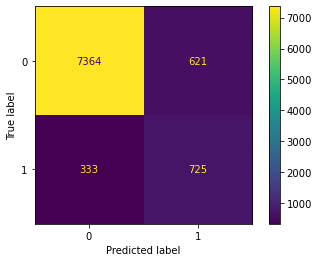

In [ ]:
cm = confusion_matrix(y_test, rf_random_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print("Precision Score: {:.3f}".format(precision_score(y_test, rf_random_pred)))
print("Recall Score:    {:.3f}".format(recall_score(y_test, rf_random_pred)))
print("F1 Score:        {:.3f}".format(f1_score(y_test, rf_random_pred)))
print("Accuracy Score:  {:.3f}".format(accuracy_score(y_test, rf_random_pred)))

Precision Score: 0.539
Recall Score:    0.685
F1 Score:        0.603
Accuracy Score:  0.895


## The F1 score improve after random grid search

# END OF REPORT - IGNORE EVERYTHING AFTER THIS, I'LL CLEAN IT UP

# Logistic Regression (Base Model)

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

classifier = LogisticRegression(penalty = 'l2')
classifier.fit(X_ros, y_ros)

# Predicting Test Set
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(results)

[[6687 1298]
 [ 215  843]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7985
           1       0.39      0.80      0.53      1058

    accuracy                           0.83      9043
   macro avg       0.68      0.82      0.71      9043
weighted avg       0.90      0.83      0.85      9043

                         Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (Lasso)  0.832688   0.393741  0.796786   0.52704


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents_train = pca.fit_transform(X_ros)
principalComponents_test = pca.transform(X_test)

principalDF_train = pd.DataFrame(data=principalComponents_train)
principalDF_test = pd.DataFrame(data=principalComponents_test)

cumsum_list = pca.explained_variance_ratio_.cumsum().tolist()
len(cumsum_list)

32

In [ ]:

required_explained_variance = 0.90

pc_columns = []

for value in cumsum_list:
  if value <= required_explained_variance:
    pc_columns.append(cumsum_list.index(value))

# pc_columns = list(range(32))

X_train_pca = principalDF_train[pc_columns]
X_test_pca = principalDF_test[pc_columns]

X_train_pca.columns = ['PC' + str(col+1) for col in X_train_pca.columns]
X_test_pca.columns = ['PC' + str(col+1) for col in X_test_pca.columns]

X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1.092355,-2.235577,0.013596,1.558383,-1.978096,2.458883,5.103864,-1.880753,0.598966,-1.053531,0.682198,0.612683
1,-0.190354,-0.582538,0.278379,-0.956271,-0.250676,0.078375,-0.042476,0.217955,-0.973928,0.804477,0.185044,0.750737
2,0.995500,-1.240807,0.137122,-0.662818,-0.402026,-0.324414,3.049280,-0.994412,0.765189,0.098186,0.087445,0.613720
3,0.955175,-0.957201,-0.433203,-0.205463,0.064877,-0.157180,-0.534911,0.225585,0.754397,-0.285671,1.107096,0.445108
4,0.071146,-0.884723,-1.234307,0.528169,-0.136655,1.543373,-0.704143,0.478669,-1.295622,-0.378016,-0.068831,-0.139370
...,...,...,...,...,...,...,...,...,...,...,...,...
63869,-1.978641,-0.260274,-1.120398,0.350810,-0.332904,1.615323,-0.689620,0.295086,0.425730,-0.444812,-1.032568,-0.055700
63870,-1.785342,-0.473625,0.500408,0.723272,-1.067070,1.177210,-0.142507,0.146205,-1.252574,-0.412984,0.104064,0.131725
63871,1.292055,2.668224,2.542992,1.806579,1.531045,-0.975667,0.094867,-2.132677,1.102117,0.233419,0.018828,0.533884
63872,-4.002426,0.648559,1.308881,-1.770003,-0.909728,0.933023,-0.256726,0.043220,0.379411,-0.085335,-0.286369,0.640532


In [ ]:
## Logistic Regression

classifier = LogisticRegression(penalty = 'l2')
classifier.fit(X_train_pca, y_ros)

# Predicting Test Set
y_pred = classifier.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(results)

[[6473 1512]
 [ 235  823]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7985
           1       0.35      0.78      0.49      1058

    accuracy                           0.81      9043
   macro avg       0.66      0.79      0.68      9043
weighted avg       0.89      0.81      0.83      9043

                         Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (Lasso)  0.806812   0.352463  0.777883  0.485116


# automated model

In [ ]:
import time
import sklearn

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB


# Metrics
from sklearn.model_selection import  GridSearchCV, ParameterGrid
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix, classification_report

In [ ]:
seed = 123
k = 4

kfolds = model_selection.KFold(n_splits=k, shuffle = True, random_state=seed)
#kfolds = model_selection.StratifiedKFold(n_splits=k, random_state=seed)
# In this case the proportion of responce "yes" and "no" is balanced well. If not, it is recommended to use "StratifiedKFold()"

# list of all classifiers for grid search
ml_model_list = [
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(),
        'useOversampledData': True,
        'hyperparams': {
            'C':[0.0001, 0.001, 0.01, 0.1, 1, 10],
            'penalty':['None', 'l2', 'elasticnet'],
            'solver':['lbfgs','sag','saga','newton-cg']
        }
    },
    {
        'name': 'KNN',
        'classifier': KNeighborsClassifier(),
        'useOversampledData': True,
        'hyperparams': {
            'n_neighbors' : (list(range(2, 21)) + list(range(22, 32, 2)) + list(range(32, 42, 4))),
            'weights' : ['distance'],
            'algorithm' : ['kd_tree']
        }
    },
    {
        'name': 'SVM',
        'classifier': SVC(),
        'useOversampledData': False,
        'hyperparams': [
            {
                'kernel' : ['linear']
            },
            {
                'kernel': ['poly'],
                'degree' : list(range(2, 6))
            },
            {
                'kernel': ['rbf'],
                'gamma': [0.01, 0.1, 1, 10]
            }
        ]
    },
    {
        'name': 'Decision Tree',
        'classifier': DecisionTreeClassifier(),
        'useOversampledData': True,
        'hyperparams': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': list(range(1, 21))
        }
    },
    {
        'name': 'Gradient Boosting',
        'classifier': GradientBoostingClassifier(),
        'useOversampledData': True,
        'hyperparams': {
            'loss': ['log_loss', 'exponential'],
            'learning_rate': [0.01, 0.1, 1, 10],
            'n_estimators': [10, 100, 1000]
        }
    },
    {
        'name': 'XGBoost',
        'classifier': XGBClassifier(),
        'useOversampledData': True,
        'hyperparams': {
            'loss': ['log_loss', 'exponential'],
            'learning_rate': [0.01, 0.1, 1, 10],
            'n_estimators': [10, 100, 1000]
        }
    },
    {
        'name': 'Random Forest',
        'classifier': RandomForestClassifier(),
        'useOversampledData': True,
        'hyperparams': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'n_estimators': [10, 100, 1000]
        }
    },
    {
        'name': 'MLPClassifier',
        'classifier': MLPClassifier(),
        'useOversampledData': True,
        'hyperparams': {
            'activation': ['relu', 'logistic'],
            # 'hidden_layer_sizes': [10, 100, 1000],
            # 'alpha': [0.00001, 0.0001, 0.001, 0.01, 1]
        }
    },
    {
        'name': 'GaussianNB',
        'classifier': GaussianNB(),
        'useOversampledData': True,
        'hyperparams': {
            'var_smoothing': [10, 100, 1e-9],
        }
    }
]

# list of best hyperparameters found after grid search

ml_model_list

[{'name': 'Logistic Regression',
  'classifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  'useOversampledData': True,
  'hyperparams': {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
   'penalty': ['None', 'l2', 'elasticnet'],
   'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']}},
 {'name': 'KNN',
  'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'),
  'useOversampledData': True,
  'hyperparams': {'n_neighbors': [2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
 

In [ ]:
best_params_list = []

In [ ]:
# iterate through
for item in ml_model_list:
  name = item.get('name')
  classifier = item.get('classifier')
  useOversampledData = item.get('useOversampledData')
  hyperparams = item.get('hyperparams')

  if name not in [item['name'] for item in best_params_list]:
    grid_search = GridSearchCV(classifier, param_grid=hyperparams, cv=kfolds, verbose=1)

    print(name)

    # if useOversampledData:
    #   input_X = X_ros
    #   input_y = y_ros
    # else:
    #   input_X = X_rus
    #   input_y = y_rus

    input_X = X_rus
    input_y = y_rus
    grid_search.fit(input_X, input_y)

    # best_params_list.append(('Logistic Regression', LogisticRegression(**grid_search.best_params_), grid_search.best_params_, grid_search.best_score_))
    best_params_list.append({
        'name': name,
        'classifier': classifier,
        'useOversampledData': useOversampledData,
        'best_classifier': grid_search,
        'best_hyperparams': grid_search.best_params_,
        'best_score': grid_search.best_score_
    })

best_params_list

Random Forest
Fitting 4 folds for each of 9 candidates, totalling 36 fits
MLPClassifier
Fitting 4 folds for each of 2 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GaussianNB
Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[{'name': 'Logistic Regression',
  'classifier': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='sag', tol=0.0001, verbose=0,
                     warm_start=False),
  'useOversampledData': True,
  'best_classifier': GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
               error_score=nan,
               estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='auto',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='sag',
                  

In [ ]:
best_params_list = [{'name': 'Logistic Regression',
  'useOversampledData': True,
  'best_hyperparams': {'C': 10, 'penalty': 'l2', 'solver': 'sag'},
  'best_score': 0.813163804314309},
 {'name': 'KNN',
  'useOversampledData': True,
  'best_hyperparams': {'algorithm': 'kd_tree',
   'n_neighbors': 12,
   'weights': 'distance'},
  'best_score': 0.8267543359834113},
 {'name': 'SVM',
  'useOversampledData': False,
  'best_hyperparams': {'gamma': 0.1, 'kernel': 'rbf'},
  'best_score': 0.8390446312458941},
 {'name': 'Decision Tree',
  'useOversampledData': True,
  'best_hyperparams': {'criterion': 'entropy', 'max_depth': 9},
  'best_score': 0.8224993520045404},
 {'name': 'Gradient Boosting',
  'useOversampledData': True,
  'best_hyperparams': {'learning_rate': 0.1,
   'loss': 'exponential',
   'n_estimators': 1000},
  'best_score': 0.8616163241228599},
 {'name': 'XGBoost',
  'useOversampledData': True,
  'best_hyperparams': {'learning_rate': 0.1,
   'loss': 'log_loss',
   'n_estimators': 100},
  'best_score': 0.8658709170699879},
 {'name': 'Random Forest',
  'useOversampledData': True,
  'best_hyperparams': {'criterion': 'log_loss', 'n_estimators': 1000},
  'best_score': 0.8610247489576212},
 {'name': 'MLPClassifier',
  'useOversampledData': True,
  'best_hyperparams': {'activation': 'logistic'},
  'best_score': 0.8272262554353411},
 {'name': 'GaussianNB',
  'classifier': GaussianNB(priors=None, var_smoothing=1e-09),
  'useOversampledData': True,
  'best_hyperparams': {'var_smoothing': 10},
  'best_score': 0.7424873864332096}]

best_params_list

[{'name': 'Logistic Regression',
  'useOversampledData': True,
  'best_hyperparams': {'C': 10, 'penalty': 'l2', 'solver': 'sag'},
  'best_score': 0.813163804314309},
 {'name': 'KNN',
  'useOversampledData': True,
  'best_hyperparams': {'algorithm': 'kd_tree',
   'n_neighbors': 12,
   'weights': 'distance'},
  'best_score': 0.8267543359834113},
 {'name': 'SVM',
  'useOversampledData': False,
  'best_hyperparams': {'gamma': 0.1, 'kernel': 'rbf'},
  'best_score': 0.8390446312458941},
 {'name': 'Decision Tree',
  'useOversampledData': True,
  'best_hyperparams': {'criterion': 'entropy', 'max_depth': 9},
  'best_score': 0.8224993520045404},
 {'name': 'Gradient Boosting',
  'useOversampledData': True,
  'best_hyperparams': {'learning_rate': 0.1,
   'loss': 'exponential',
   'n_estimators': 1000},
  'best_score': 0.8616163241228599},
 {'name': 'XGBoost',
  'useOversampledData': True,
  'best_hyperparams': {'learning_rate': 0.1,
   'loss': 'log_loss',
   'n_estimators': 100},
  'best_score': 0

In [ ]:
# Fit each machine learning algorithms with default value with data resampling
sklearn.set_config(print_changed_only=False) # Only here to force the display of default parameters in the prints

results = []

for item in best_params_list:
  name = item.get('name')
  classifier = item.get('classifier')
  useOversampledData = item.get('useOversampledData')
  best_classifier = item.get('best_classifier')
  best_hyperparams = item.get('best_hyperparams')

  # print(f"{classifier}")
  for key, value in best_hyperparams.items():
    classifier.__setattr__(key, value)
  # print(f"{classifier}")

  ## train classifier from scratch
  # if useOversampledData:
  #   input_X = X_ros
  #   input_y = y_ros
  # else:
  #   input_X = X_rus
  #   input_y = y_rus
  # classifier.fit(input_X, input_y)
  # y_test_pred = classifier.predict(X_test)

  # use best classifier identified in grid search
  y_test_pred = best_classifier.predict(X_test)

  # calculate metrics
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  accuracy = accuracy_score(y_test, y_test_pred)
  cnf_mat = confusion_matrix(y_test, y_test_pred)
  clf_report = classification_report(y_test, y_test_pred)

  results.append({
      'Classifier Name': name,
      'Hyperparams': best_hyperparams,
      'Precision': precision,
      'Recall': recall,
      'F1 Score': f1,
      'Accuracy': accuracy,
      'Confusion Matrix': cnf_mat,
      'Classification Report': clf_report
  })

# results_df = pd.DataFrame(results)

# results_df

results

[{'Classifier Name': 'Logistic Regression',
  'Hyperparams': {'C': 10, 'penalty': 'l2', 'solver': 'sag'},
  'Precision': 0.39134438305709024,
  'Recall': 0.8034026465028355,
  'F1 Score': 0.5263157894736842,
  'Accuracy': 0.830808360057503,
  'Confusion Matrix': array([[6663, 1322],
         [ 208,  850]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.83      0.90      7985\n           1       0.39      0.80      0.53      1058\n\n    accuracy                           0.83      9043\n   macro avg       0.68      0.82      0.71      9043\nweighted avg       0.90      0.83      0.85      9043\n'},
 {'Classifier Name': 'KNN',
  'Hyperparams': {'algorithm': 'kd_tree',
   'n_neighbors': 12,
   'weights': 'distance'},
  'Precision': 0.40522875816993464,
  'Recall': 0.8204158790170132,
  'F1 Score': 0.5425,
  'Accuracy': 0.8381068229569834,
  'Confusion Matrix': array([[6711, 1274],
         [ 190,  868]]),
  'Classificat

# other

In [ ]:
# Fit each machine learning algorithms with default value with data resampling
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc_clf', SVC()),
    ('knn_clf', KNeighborsClassifier()),
    ('tree_clf', tree.DecisionTreeClassifier()),
    ('grad_clf', GradientBoostingClassifier()),
    ('xgb_clf', XGBClassifier()),
    ('rand_clf', RandomForestClassifier()),
    ('neural_clf', MLPClassifier(alpha=1)),
    ('nav_clf', GaussianNB()),
]

results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train['y'].values)
    y_test_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)

    results.append({
        'Classifier Name': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)

results_df

,Classifier,Precision,Recall,F1 Score,Accuracy
0,log_reg,0.410147,0.817580,0.546258,0.841093
1,svc_clf,0.412289,0.875236,0.560533,0.839434
2,knn_clf,0.331146,0.715501,0.452751,0.797634
3,tree_clf,0.348733,0.806238,0.486872,0.801172
4,grad_clf,0.409372,0.875236,0.557831,0.837664
5,xgb_clf,0.433074,0.896030,0.583924,0.850603
6,rand_clf,0.408781,0.906427,0.563455,0.835674
7,neural_clf,0.414450,0.883743,0.564273,0.840318
8,nav_clf,0.357491,0.624764,0.454764,0.824726


In [ ]:
### Logistic Regression

LR = LogisticRegression()


params = {
    'C':[0.0001, 0.001, 0.01, 0.1, 1, 10],
    'penalty':['None', 'l2', 'elasticnet'] ,
    'solver':['lbfgs','sag','saga','newton-cg']
}

grid_knn = GridSearchCV(LR, param_grid=params, cv=kfolds, verbose=1)
grid_knn.fit(X_train, y_train['y'].values)

best_params_list.append(('Logistic Regression', LogisticRegression(**grid_knn.best_params_), grid_knn.best_params_, grid_knn.best_score_))

print(grid_knn.best_score_)
print(grid_knn.best_params_)

best_params_list

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

0.8370357345212277
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

[('Logistic Regression',
  LogisticRegression(C=0.1),
  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'},
  0.8370357345212277)]

In [ ]:
### KNN

KNN = KNeighborsClassifier()

params = {
    'n_neighbors' : (list(range(2, 21)) + list(range(22, 40, 2))),
    'weights' : ['distance'],
    'algorithm' : ['kd_tree']
}

grid_knn = GridSearchCV(KNN, param_grid=params, cv=kfolds, verbose=1)
grid_knn.fit(X_train, y_train['y'].values)

Fitting 10 folds for each of 38 candidates, totalling 380 fits


KeyboardInterrupt: ignored

In [ ]:
best_params_list

[('Logistic Regression',
  LogisticRegression(C=0.1),
  {'C': 0.1},
  0.8370357345212277),
 ('Logistic Regression',
  LogisticRegression(C=0.1),
  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'},
  0.8370357345212277)]

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(**(grid_knn.best_params_))
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', str(p), acc, prec, rec, f1]],
               columns = ['Model', 'Hyperparameters', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Hyperparameters,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.840429,0.972415,0.843206,0.903213


In [ ]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.7693229615860175
{'algorithm': 'kd_tree', 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8, weights='distance')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# results = results.append(model_results, ignore_index = True)
model_results

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Model,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors (minkowski),0.829813,0.389527,0.801512,0.524266


# before

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train_encoded, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import *

y_pred = LR.predict(X_test_encoded)

c1 = confusion_matrix(y_test, y_pred)
c1

array([[7898,   87],
       [ 892,  166]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8917394669910428

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.66      0.16      0.25      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.57      0.60      9043
weighted avg       0.87      0.89      0.86      9043



In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the original class distribution
print("Original class distribution:", np.bincount(y_train))

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote_encoded, y_smote = smote.fit_resample(X_train_encoded, y_train)
print("Class distribution after SMOTE:", np.bincount(y_smote))

# Random oversampling
ros = RandomOverSampler(sampling_strategy='auto')
X_ros_encoded, y_ros = ros.fit_resample(X_train_encoded, y_train)
print("Class distribution after Random OverSampling:", np.bincount(y_ros))

# Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus_encoded, y_rus = rus.fit_resample(X_train_encoded, y_train)
print("Class distribution after Random UnderSampling:", np.bincount(y_rus))

Original class distribution: [31937  4231]
Class distribution after SMOTE: [31937 31937]
Class distribution after Random OverSampling: [31937 31937]
Class distribution after Random UnderSampling: [4231 4231]


In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score, GridSearchCV

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_ros_encoded, y_ros, cv=3)
log_reg_mean = log_scores.mean()

log_reg_mean

0.6729342856434193

In [ ]:
df_dummies = df_postprocessed.copy()
df_test_dummies = df_test_postprocessed.copy()

dummy_columns = ['job', 'marital', 'education', 'contact', 'poutcome']

# creating dummy variables for categorical data and Standardize the numerical data
df_dummies = pd.get_dummies(df_dummies, columns=dummy_columns)
df_test_dummies = pd.get_dummies(df_test_dummies, columns=dummy_columns)

# reindexing the testing dataset as we want to feed our model with the same columns as the train dataset
df_test_dummies = df_test_dummies.reindex(columns=df_dummies.columns, fill_value=0)

df_dummies

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,42,0,-78,1,1,29,7,10,23,-1,...,1,0,0,1,0,0,0,0,0,1
1,50,0,106,1,0,15,5,388,2,-1,...,0,1,0,0,0,1,0,0,0,1
2,47,0,407,1,0,5,6,67,12,-1,...,1,0,0,0,0,1,0,0,0,1
3,39,0,952,1,0,16,6,62,1,-1,...,1,0,0,0,0,1,0,0,0,1
4,30,0,364,0,0,30,4,306,2,-1,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,0,1243,1,0,13,11,86,1,174,...,0,1,0,0,1,0,1,0,0,0
36164,60,0,171,1,0,19,5,219,2,-1,...,1,0,0,0,0,1,0,0,0,1
36165,41,0,-274,1,0,27,5,182,3,-1,...,1,0,0,0,0,1,0,0,0,1
36166,45,0,103,0,0,28,1,64,3,-1,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_test_dummies

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,48,0,468,1,0,14,5,220,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,31,0,10215,0,0,22,8,139,2,-1,...,0,1,0,1,0,0,0,0,0,1
2,45,0,900,1,0,9,6,213,1,-1,...,0,0,0,0,0,1,0,0,0,1
3,58,0,1231,0,0,20,6,21,3,-1,...,0,0,0,0,0,1,0,0,0,1
4,35,0,5301,0,0,21,11,937,2,-1,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,27,0,1,1,1,2,6,162,3,-1,...,1,0,0,0,0,1,0,0,0,1
9039,34,0,175,1,0,14,5,50,2,364,...,1,0,0,1,0,0,1,0,0,0
9040,34,0,1873,1,0,2,2,192,1,-1,...,0,0,0,1,0,0,0,0,0,1
9041,37,0,61,1,0,19,5,182,8,-1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
# scaling the dummy values
sc_dummies = StandardScaler()

X_train_dummies_unscaled = df_dummies.drop(columns=['y'])
# y_train = df_dummies['y']

X_test_dummies_unscaled = df_test_dummies.drop(columns=['y'])
# y_test = df_test_dummies['y']

X_train_dummies = pd.DataFrame(sc_dummies.fit_transform(X_train_dummies_unscaled), index=X_train_dummies_unscaled.index, columns=X_train_dummies_unscaled.columns)
X_test_dummies = pd.DataFrame(sc_dummies.transform(X_test_dummies_unscaled), index=X_test_dummies_unscaled.index, columns=X_test_dummies_unscaled.columns)

X_train_dummies

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.099649,-0.13528,-0.465780,0.897553,2.295511,1.590410,0.355510,-0.965700,6.485410,-0.409359,...,0.974231,-0.644911,-0.207719,0.739570,-0.262407,-0.637784,-0.344950,-0.207357,-0.185886,0.470046
1,0.853196,-0.13528,-0.406390,0.897553,-0.435633,-0.093650,-0.476837,0.504062,-0.246819,-0.409359,...,-1.026450,1.550602,-0.207719,-1.352138,-0.262407,1.567930,-0.344950,-0.207357,-0.185886,0.470046
2,0.570616,-0.13528,-0.309235,0.897553,-0.435633,-1.296549,-0.060663,-0.744070,2.959004,-0.409359,...,0.974231,-0.644911,-0.207719,-1.352138,-0.262407,1.567930,-0.344950,-0.207357,-0.185886,0.470046
3,-0.182931,-0.13528,-0.133323,0.897553,-0.435633,0.026640,-0.060663,-0.763511,-0.567401,-0.409359,...,0.974231,-0.644911,-0.207719,-1.352138,-0.262407,1.567930,-0.344950,-0.207357,-0.185886,0.470046
4,-1.030671,-0.13528,-0.323114,-1.114140,-0.435633,1.710700,-0.893011,0.185224,-0.246819,-0.409359,...,-1.026450,1.550602,-0.207719,0.739570,-0.262407,-0.637784,-0.344950,-0.207357,-0.185886,0.470046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-1.030671,-0.13528,-0.039396,0.897553,-0.435633,-0.334230,2.020205,-0.670193,-0.567401,1.348628,...,-1.026450,1.550602,-0.207719,-1.352138,3.810872,-0.637784,2.898975,-0.207357,-0.185886,-2.127452
36164,1.795129,-0.13528,-0.385410,0.897553,-0.435633,0.387510,-0.476837,-0.153054,-0.246819,-0.409359,...,0.974231,-0.644911,-0.207719,-1.352138,-0.262407,1.567930,-0.344950,-0.207357,-0.185886,0.470046
36165,0.005456,-0.13528,-0.529044,0.897553,-0.435633,1.349830,-0.476837,-0.296920,0.073764,-0.409359,...,0.974231,-0.644911,-0.207719,-1.352138,-0.262407,1.567930,-0.344950,-0.207357,-0.185886,0.470046
36166,0.382229,-0.13528,-0.407358,-1.114140,-0.435633,1.470120,-2.141532,-0.755734,0.073764,-0.409359,...,-1.026450,-0.644911,-0.207719,0.739570,-0.262407,-0.637784,-0.344950,-0.207357,-0.185886,0.470046


In [ ]:
X_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36168 non-null  float64
 1   default              36168 non-null  float64
 2   balance              36168 non-null  float64
 3   housing              36168 non-null  float64
 4   loan                 36168 non-null  float64
 5   day                  36168 non-null  float64
 6   month                36168 non-null  float64
 7   duration             36168 non-null  float64
 8   campaign             36168 non-null  float64
 9   pdays                36168 non-null  float64
 10  pdays_binary         36168 non-null  float64
 11  previous             36168 non-null  float64
 12  job_admin.           36168 non-null  float64
 13  job_blue-collar      36168 non-null  float64
 14  job_entrepreneur     36168 non-null  float64
 15  job_housemaid        36168 non-null 

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Check the original class distribution
print("Original class distribution:", np.bincount(y_train))

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote_dummies, y_smote = smote.fit_resample(X_train_dummies, y_train)
print("Class distribution after SMOTE:", np.bincount(y_smote))

# Random oversampling
ros = RandomOverSampler(sampling_strategy='auto')
X_ros_dummies, y_ros = ros.fit_resample(X_train_dummies, y_train)
print("Class distribution after Random OverSampling:", np.bincount(y_ros))

# Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus_dummies, y_rus = rus.fit_resample(X_train_dummies, y_train)
print("Class distribution after Random UnderSampling:", np.bincount(y_rus))

Original class distribution: [31937  4231]
Class distribution after SMOTE: [31937 31937]
Class distribution after Random OverSampling: [31937 31937]
Class distribution after Random UnderSampling: [4231 4231]


In [ ]:
# Logistic Regression
log_reg_dummies = LogisticRegression()
log_scores = cross_val_score(log_reg_dummies, X_ros_dummies, y_ros, cv=3)
log_reg_mean = log_scores.mean()

log_reg_mean

0.8147133498893527

In [ ]:
# Fit each machine learning algorithms with default value with data resampling
classifiers = [
    ('log_reg', LogisticRegression()),
    # ('svc_clf', SVC()),
    # ('knn_clf', KNeighborsClassifier()),
    # ('tree_clf', tree.DecisionTreeClassifier()),
    # ('grad_clf', GradientBoostingClassifier()),
    # ('xgb_clf', XGBClassifier()),
    # ('rand_clf', RandomForestClassifier()),
    # ('neural_clf', MLPClassifier(alpha=1)),
    # ('nav_clf', GaussianNB()),
]

results = []

for name, clf in classifiers:
    clf.fit(X_ros_dummies, y_ros)
    y_test_pred = clf.predict(X_test_dummies)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)

    results.append({
        'Classifier': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)

results_df

,Classifier,Precision,Recall,F1 Score,Accuracy
0,log_reg,0.390255,0.794896,0.523498,0.830698


In [ ]:
X_ros_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63874 entries, 0 to 63873
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  63874 non-null  float64
 1   default              63874 non-null  float64
 2   balance              63874 non-null  float64
 3   housing              63874 non-null  float64
 4   loan                 63874 non-null  float64
 5   day                  63874 non-null  float64
 6   month                63874 non-null  float64
 7   duration             63874 non-null  float64
 8   campaign             63874 non-null  float64
 9   pdays                63874 non-null  float64
 10  pdays_binary         63874 non-null  float64
 11  previous             63874 non-null  float64
 12  job_admin.           63874 non-null  float64
 13  job_blue-collar      63874 non-null  float64
 14  job_entrepreneur     63874 non-null  float64
 15  job_housemaid        63874 non-null 

In [ ]:
## Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

drop_columns = ['job_unknown', 'marital_single', 'education_unknown', 'contact_unknown', 'poutcome_unknown']

classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_ros_dummies.drop(columns=drop_columns), y_ros)

# Predicting Test Set
y_pred = classifier.predict(X_test_dummies.drop(columns=drop_columns))
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.830919,0.391123,0.799622,0.525303


In [ ]:
## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_ros_dummies.drop(columns=drop_columns), y_ros)

# Predicting Test Set
y_pred = classifier.predict(X_test_dummies.drop(columns=drop_columns))
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

results

<ipython-input-489-886c24eda3d9>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.830919,0.391123,0.799622,0.525303
1,K-Nearest Neighbors (minkowski),0.791773,0.327622,0.741021,0.454361


In [ ]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_ros_dummies, y_ros)

# Predicting Test Set
y_pred = classifier.predict(X_test_dummies)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

results

# kaggle bank marketing

In [ ]:
df_postprocessed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,pdays_binary,previous,poutcome,y
0,42,technician,divorced,secondary,0,-78,1,1,cellular,29,7,10,23,-1,0,0,unknown,0
1,50,management,married,tertiary,0,106,1,0,unknown,15,5,388,2,-1,0,0,unknown,0
2,47,admin.,married,secondary,0,407,1,0,unknown,5,6,67,12,-1,0,0,unknown,0
3,39,admin.,divorced,secondary,0,952,1,0,unknown,16,6,62,1,-1,0,0,unknown,0
4,30,management,single,tertiary,0,364,0,0,cellular,30,4,306,2,-1,0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,0,1243,1,0,telephone,13,11,86,1,174,1,1,failure,0
36164,60,blue-collar,married,secondary,0,171,1,0,unknown,19,5,219,2,-1,0,0,unknown,0
36165,41,technician,married,secondary,0,-274,1,0,unknown,27,5,182,3,-1,0,0,unknown,0
36166,45,blue-collar,married,primary,0,103,0,0,cellular,28,1,64,3,-1,0,0,unknown,0


In [ ]:
df_dropped = df_postprocessed.copy()
df_test_dropped = df_test_postprocessed.copy()

columns_to_drop = ['job','marital', 'education', 'housing', 'loan', 'contact', 'day', 'month', 'pdays_binary', 'poutcome']

df_dropped = df_dropped.drop(columns=columns_to_drop)
df_test_dropped = df_test_dropped.drop(columns=columns_to_drop)

df_dropped

,age,default,balance,duration,campaign,pdays,previous,y
0,42,0,-78,10,23,-1,0,0
1,50,0,106,388,2,-1,0,0
2,47,0,407,67,12,-1,0,0
3,39,0,952,62,1,-1,0,0
4,30,0,364,306,2,-1,0,1
...,...,...,...,...,...,...,...,...
36163,30,0,1243,86,1,174,1,0
36164,60,0,171,219,2,-1,0,0
36165,41,0,-274,182,3,-1,0,0
36166,45,0,103,64,3,-1,0,0


In [ ]:
vif_dropped = calculate_vif(df_dropped.drop(columns=['y']))
vif_dropped

,feature,VIF
0,age,3.006691
1,default,1.021394
2,balance,1.210361
3,duration,1.890902
4,campaign,1.712948
5,pdays,1.424725
6,previous,1.310188


In [ ]:
# scaling the dummy values
sc_dropped = StandardScaler()

X_train_dropped_unscaled = df_dropped.drop(columns=['y'])
# y_train = df_dummies['y']

X_test_dropped_unscaled = df_test_dropped.drop(columns=['y'])
# y_test = df_test_dummies['y']

X_train_dropped = pd.DataFrame(sc_dropped.fit_transform(X_train_dropped_unscaled), index=X_train_dropped_unscaled.index, columns=X_train_dropped_unscaled.columns)
X_test_dropped = pd.DataFrame(sc_dropped.transform(X_test_dropped_unscaled), index=X_test_dropped_unscaled.index, columns=X_test_dropped_unscaled.columns)

X_train_dropped

,age,default,balance,duration,campaign,pdays,previous
0,0.099649,-0.13528,-0.465780,-0.965700,6.485410,-0.409359,-0.243040
1,0.853196,-0.13528,-0.406390,0.504062,-0.246819,-0.409359,-0.243040
2,0.570616,-0.13528,-0.309235,-0.744070,2.959004,-0.409359,-0.243040
3,-0.182931,-0.13528,-0.133323,-0.763511,-0.567401,-0.409359,-0.243040
4,-1.030671,-0.13528,-0.323114,0.185224,-0.246819,-0.409359,-0.243040
...,...,...,...,...,...,...,...
36163,-1.030671,-0.13528,-0.039396,-0.670193,-0.567401,1.348628,0.176283
36164,1.795129,-0.13528,-0.385410,-0.153054,-0.246819,-0.409359,-0.243040
36165,0.005456,-0.13528,-0.529044,-0.296920,0.073764,-0.409359,-0.243040
36166,0.382229,-0.13528,-0.407358,-0.755734,0.073764,-0.409359,-0.243040


In [ ]:
# Check the original class distribution
print("Original class distribution:", np.bincount(y_train))

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote_dropped, y_smote = smote.fit_resample(X_train_dropped, y_train)
print("Class distribution after SMOTE:", np.bincount(y_smote))

# Random oversampling
ros = RandomOverSampler(sampling_strategy='auto')
X_ros_dropped, y_ros = ros.fit_resample(X_train_dropped, y_train)
print("Class distribution after Random OverSampling:", np.bincount(y_ros))

# Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus_dropped, y_rus = rus.fit_resample(X_train_dropped, y_train)
print("Class distribution after Random UnderSampling:", np.bincount(y_rus))

Original class distribution: [31937  4231]
Class distribution after SMOTE: [31937 31937]
Class distribution after Random OverSampling: [31937 31937]
Class distribution after Random UnderSampling: [4231 4231]


In [ ]:
y_ros.value_counts()

0    31937
1    31937
Name: y, dtype: int64

In [ ]:
# Fit each machine learning algorithms with default value with data resampling
classifiers = [
    ('log_reg', LogisticRegression()),
    # ('svc_clf', SVC()),
    # ('knn_clf', KNeighborsClassifier()),
    # ('tree_clf', tree.DecisionTreeClassifier()),
    # ('grad_clf', GradientBoostingClassifier()),
    # ('xgb_clf', XGBClassifier()),
    # ('rand_clf', RandomForestClassifier()),
    # ('neural_clf', MLPClassifier(alpha=1)),
    # ('nav_clf', GaussianNB()),
]

results = []

for name, clf in classifiers:
    clf.fit(X_rus_dropped, y_rus)
    y_test_pred = clf.predict(X_test_dropped)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)

    results.append({
        'Classifier': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)

results_df

,Classifier,Precision,Recall,F1 Score,Accuracy
0,log_reg,0.316046,0.673913,0.430296,0.79122


In [ ]:
## Logistic Regression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_rus_dropped, y_rus)

# Predicting Test Set
y_pred = classifier.predict(X_test_dropped)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.79122,0.316046,0.673913,0.430296


# again

In [ ]:
#Define X and y
columns_to_drop = ['job','marital', 'education', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'y']

X_raw_unscaled = df_raw.drop(columns=columns_to_drop)
y_raw = df_raw['y']

X_test_raw_unscaled = df_test_raw.drop(columns=columns_to_drop)
y_test_raw = df_test_raw['y']

X_raw_unscaled

,age,default,balance,duration,campaign,pdays,previous
0,42,no,-78,10,23,-1,0
1,50,no,106,388,2,-1,0
2,47,no,407,67,12,-1,0
3,39,no,952,62,1,-1,0
4,30,no,364,306,2,-1,0
...,...,...,...,...,...,...,...
36163,30,no,1243,86,1,174,1
36164,60,no,171,219,2,-1,0
36165,41,no,-274,182,3,-1,0
36166,45,no,103,64,3,-1,0


In [ ]:
# get dummies
X_raw_unscaled = pd.get_dummies(X_raw_unscaled)
y_raw = pd.get_dummies(y_raw)

X_test_raw_unscaled = pd.get_dummies(X_test_raw_unscaled)
y_test_raw = pd.get_dummies(y_test_raw)

# rename dummy columns
X_raw_unscaled = X_raw_unscaled.drop(['default_no'], axis= 1)
X_raw_unscaled = X_raw_unscaled.rename(columns = {'default_yes': 'default'})
y_raw = y_raw.drop(['yes'], axis=1)
y_raw = y_raw.rename(columns= {'no': 'y'})

X_test_raw_unscaled = X_test_raw_unscaled.drop(['default_no'], axis= 1)
X_test_raw_unscaled = X_test_raw_unscaled.rename(columns = {'default_yes': 'default'})
y_test_raw = y_test_raw.drop(['yes'], axis=1)
y_test_raw = y_test_raw.rename(columns= {'no': 'y'})

X_raw_unscaled

,age,balance,duration,campaign,pdays,previous,default
0,42,-78,10,23,-1,0,0
1,50,106,388,2,-1,0,0
2,47,407,67,12,-1,0,0
3,39,952,62,1,-1,0,0
4,30,364,306,2,-1,0,0
...,...,...,...,...,...,...,...
36163,30,1243,86,1,174,1,0
36164,60,171,219,2,-1,0,0
36165,41,-274,182,3,-1,0,0
36166,45,103,64,3,-1,0,0


In [ ]:
print(X_raw_unscaled.shape, X_test_raw_unscaled.shape, y_raw.shape, y_test_raw.shape)

(36168, 7) (9043, 7) (36168, 1) (9043, 1)


In [ ]:
y_raw['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [ ]:
import random

pos_index = y_raw[y_raw.values == 1].index
neg_index = y_raw[y_raw.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_raw__unscaled_balanced = X_raw_unscaled.loc[new_indexes]
y_raw_balanced = y_raw.loc[new_indexes]

y_raw_balanced['y'].value_counts()

0    4231
1    4231
Name: y, dtype: int64

In [ ]:
sc_raw = StandardScaler()

X_train_raw = pd.DataFrame(sc_raw.fit_transform(X_raw__unscaled_balanced), index=X_raw__unscaled_balanced.index, columns=X_raw__unscaled_balanced.columns)
X_test_raw = pd.DataFrame(sc_raw.transform(X_test_raw_unscaled), index=X_test_raw_unscaled.index, columns=X_test_raw_unscaled.columns)

X_train_raw

,age,balance,duration,campaign,pdays,previous,default
4,-0.944280,-0.377198,-0.211406,-0.197345,-0.489630,-0.386623,-0.11943
15,0.576689,0.555555,1.992332,-0.573880,-0.489630,-0.386623,-0.11943
25,1.337174,-0.440683,-0.034094,-0.573880,-0.489630,-0.386623,-0.11943
31,3.027140,-0.366454,-0.228293,0.179190,-0.489630,-0.386623,-0.11943
38,1.252676,-0.212460,-0.453451,-0.573880,1.134172,0.082223,-0.11943
...,...,...,...,...,...,...,...
8419,0.830184,0.536346,-0.929099,-0.573880,-0.489630,-0.386623,-0.11943
6320,0.999181,0.965119,-0.850293,-0.197345,-0.489630,-0.386623,-0.11943
33793,-0.606287,-0.495704,-0.557587,2.814936,-0.489630,-0.386623,-0.11943
2120,0.238696,-0.403243,-0.765859,0.932260,-0.489630,-0.386623,-0.11943


In [ ]:


## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train_raw, y_raw_balanced)

# Predicting Test Set
y_pred = classifier.predict(X_test_raw)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.210328,0.049741,0.31758,0.08601


In [ ]:


## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train_raw, y_raw_balanced)

# Predicting Test Set
y_pred = classifier.predict(X_test_raw)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

results

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-126-be407596e946>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.210328,0.049741,0.317580,0.086010
1,SVM (Linear),0.206126,0.049595,0.318526,0.085827


# Models 1

In [ ]:
X_train = X_ros
y_train = y_ros

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.832688,0.393741,0.796786,0.52704


In [ ]:
## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-45-57efe32d5bb4>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_rus, y_rus)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-46-b8183f597781>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
classifier.fit(X_rus, y_rus)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-47-dc944f1c9cce>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-48-799bd325c4e9>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-49-6eceee7b3634>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Random Forest Gini (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-50-70e0c58d7a24>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Random Forest Gini (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-51-a932006bdc3d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Random Forest Gini (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-52-bcfcb0576e3d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Random Forest Entropy (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-53-01cacb3a13f8>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Random Forest Entropy (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-54-31ea358a4d5c>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
## Random Forest Entropy (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-55-c865e98e84c4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.832688,0.393741,0.796786,0.527040
1,K-Nearest Neighbors (minkowski),0.810793,0.361359,0.804348,0.498682
2,SVM (Linear),0.827270,0.384826,0.795841,0.518792
3,SVM (RBF),0.814442,0.373984,0.869565,0.523024
4,Naive Bayes (Gaussian),0.792768,0.309346,0.625709,0.414009
5,Decision Tree,0.879022,0.482422,0.466919,0.474544
6,Random Forest Gini (n=100),0.903572,0.604730,0.507561,0.551901
7,Random Forest Gini (n=200),0.903793,0.604213,0.515123,0.556122
8,Random Forest Gini (n=300),0.903129,0.600887,0.512287,0.553061
9,Random Forest Entropy (n=100),0.902577,0.595676,0.520794,0.555724


# pca2

In [ ]:
df_pca = df_preprocessed.copy().drop(columns=['pdays_binary'])
df_test_pca = df_preprocessed.copy().drop(columns=['pdays_binary'])

# df_postprocessed = df_eda.copy().drop(columns=['day'])
# df_test_postprocessed = df_test_preprocessed.copy().drop(columns=['day'])

# yes-no encoding
target_mapping = {'no': 0, 'yes': 1}


for column in df_pca:
  # check if the column is an object type and if the values in a column are exclusively 'yes' and 'no'
  if (df_pca[column].dtype == 'object' and set(df_pca[column].unique().tolist()) == {'yes', 'no'}):
    # encode yes-no column values as 1-0
    df_pca[column] = df_pca[column].map(target_mapping)
    df_test_pca[column] = df_test_pca[column].map(target_mapping)

df_pca

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,0,-78,1,1,cellular,29,7,10,23,-1,0,unknown,0
1,50,management,married,tertiary,0,106,1,0,unknown,15,5,388,2,-1,0,unknown,0
2,47,admin.,married,secondary,0,407,1,0,unknown,5,6,67,12,-1,0,unknown,0
3,39,admin.,divorced,secondary,0,952,1,0,unknown,16,6,62,1,-1,0,unknown,0
4,30,management,single,tertiary,0,364,0,0,cellular,30,4,306,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,management,single,tertiary,0,1243,1,0,telephone,13,11,86,1,174,1,failure,0
36164,60,blue-collar,married,secondary,0,171,1,0,unknown,19,5,219,2,-1,0,unknown,0
36165,41,technician,married,secondary,0,-274,1,0,unknown,27,5,182,3,-1,0,unknown,0
36166,45,blue-collar,married,primary,0,103,0,0,cellular,28,1,64,3,-1,0,unknown,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_pca_encoded = df_pca.copy()
df_test_pca_encoded = df_test_pca.copy()

# encode labels
labelencoder = LabelEncoder()

for column in df_pca_encoded.columns:
  labelencoder.fit(df_pca_encoded[column])
  df_pca_encoded[column] = labelencoder.transform(df_pca_encoded[column])
  df_test_pca_encoded[column] = labelencoder.transform(df_test_pca_encoded[column])

df_pca_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24,9,0,1,0,774,1,1,0,28,6,9,22,0,0,3,0
1,32,4,1,2,0,958,1,0,2,14,4,387,1,0,0,3,0
2,29,0,1,1,0,1259,1,0,2,4,5,66,11,0,0,3,0
3,21,0,0,1,0,1804,1,0,2,15,5,61,0,0,0,3,0
4,12,4,2,2,0,1216,0,0,0,29,3,305,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,12,4,2,2,0,2095,1,0,1,12,10,85,0,169,1,0,0
36164,42,1,1,1,0,1023,1,0,2,18,4,218,1,0,0,3,0
36165,23,9,1,1,0,579,1,0,2,26,4,181,2,0,0,3,0
36166,27,1,1,0,0,955,0,0,0,27,0,63,2,0,0,3,0


In [ ]:
sc_pca = StandardScaler()

X_train_pca_unscaled = df_pca_encoded.drop(columns=['y'])
y_train = df_pca_encoded['y']

X_test_pca_unscaled = df_test_pca_encoded.drop(columns=['y'])
y_test = df_test_pca_encoded['y']

X_train_pca = pd.DataFrame(sc_pca.fit_transform(X_train_pca_unscaled), index=X_train_pca_unscaled.index, columns=X_train_pca_unscaled.columns)
X_test_pca = pd.DataFrame(sc_pca.transform(X_test_pca_unscaled), index=X_test_pca_unscaled.index, columns=X_test_pca_unscaled.columns)

X_train_pca

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.099669,1.427969,-1.922527,-0.300003,-0.13528,-0.787998,0.897553,2.295511,-0.715050,1.590410,0.355510,-1.032559,6.529857,-0.412076,-0.305284,0.442394
1,0.853264,-0.100232,-0.276636,1.035607,-0.13528,-0.655678,0.897553,-0.435633,1.510015,-0.093650,-0.476837,0.560869,-0.248047,-0.412076,-0.305284,0.442394
2,0.570666,-1.322794,-0.276636,-0.300003,-0.13528,-0.439220,0.897553,-0.435633,1.510015,-1.296549,-0.060663,-0.792280,2.979526,-0.412076,-0.305284,0.442394
3,-0.182929,-1.322794,-1.922527,-0.300003,-0.13528,-0.047295,0.897553,-0.435633,1.510015,0.026640,-0.060663,-0.813357,-0.570804,-0.412076,-0.305284,0.442394
4,-1.030724,-0.100232,1.369255,1.035607,-0.13528,-0.470143,-1.114140,-0.435633,-0.715050,1.710700,-0.893011,0.215205,-0.248047,-0.412076,-0.305284,0.442394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-1.030724,-0.100232,1.369255,1.035607,-0.13528,0.161972,0.897553,-0.435633,0.397482,-0.334230,2.020205,-0.712187,-0.570804,1.360089,0.229078,-2.609585
36164,1.795258,-1.017153,-0.276636,-0.300003,-0.13528,-0.608935,0.897553,-0.435633,1.510015,0.387510,-0.476837,-0.151537,-0.248047,-0.412076,-0.305284,0.442394
36165,0.005469,1.427969,-0.276636,-0.300003,-0.13528,-0.928228,0.897553,-0.435633,1.510015,1.349830,-0.476837,-0.307507,0.074710,-0.412076,-0.305284,0.442394
36166,0.382267,-1.017153,-0.276636,-1.635613,-0.13528,-0.657836,-1.114140,-0.435633,-0.715050,1.470120,-2.141532,-0.804926,0.074710,-0.412076,-0.305284,0.442394


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(X_train_pca)

principalDf = pd.DataFrame(data=principalComponents)

pca.components_

array([[-0.03461988, -0.00505825,  0.03792908,  0.02361295, -0.04137158,
         0.03664418,  0.08092404, -0.0197225 , -0.24135144, -0.10024836,
        -0.07318955,  0.01432202, -0.10741484,  0.57437221,  0.48021136,
        -0.58385032],
       [ 0.33298206,  0.25528366, -0.15416272,  0.22437268, -0.07387379,
         0.31315689, -0.5000258 , -0.1067902 , -0.37491456,  0.16264627,
         0.4543689 , -0.00579344,  0.09116245, -0.0358803 ,  0.04042225,
        -0.01257347],
       [ 0.57537934, -0.28887726, -0.60359273, -0.41024686,  0.01077268,
         0.01024639,  0.05157998,  0.08500507,  0.16268708, -0.08797967,
        -0.01547136, -0.01085968, -0.04743925,  0.05003028,  0.03472113,
        -0.04722931],
       [-0.07801995, -0.05468858, -0.05782412, -0.07666239,  0.35667882,
        -0.37861575,  0.0191167 ,  0.40693184, -0.15560481,  0.39920683,
         0.17087266, -0.33154177,  0.45810175,  0.05968628,  0.07264221,
        -0.06147964],
       [-0.01151679, -0.15201244,  0

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.15725446, 0.25732863, 0.35103386, 0.4281277 , 0.49783254,
       0.56086019, 0.62003992, 0.67821808, 0.73356547, 0.78538258,
       0.83638966, 0.88552306, 0.92846992, 0.96131332, 0.9918223 ,
       1.        ])